In [68]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os
from numpy.random import seed
from sklearn.preprocessing import StandardScaler, minmax_scale
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense
from keras.models import Sequential, Model
from keras.optimizers import Adam

In [69]:
data_files = glob.glob("../Tell1CalibCsv/*.csv")

In [70]:
def module_names():
    names = []
    data = pd.read_csv(data_files[0] ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("pedestal")]
    names = data[1]
    return names

In [88]:
ncol = 84
model = Sequential()

# Encoder Layers
model.add(Dense(64, activation = 'relu', input_shape=(ncol,)))
model.add(Dense(44, activation = 'relu'))
model.add(Dense(24, activation = 'relu'))
model.add(Dense(14, activation = 'relu'))
model.add(Dense(8 , activation = 'relu'))
model.add(Dense(4 , activation = 'relu'))
model.add(Dense(2 , activation = 'relu', name="bottleneck"))

# Decoder Layers
model.add(Dense(4 , activation = 'relu'))
model.add(Dense(8 , activation = 'relu'))
model.add(Dense(14, activation = 'relu'))
model.add(Dense(24, activation = 'relu'))
model.add(Dense(44, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(84, activation = 'sigmoid'))

# Compile the Model
model.compile(loss = 'mean_squared_error', optimizer = Adam())

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_354 (Dense)            (None, 64)                5440      
_________________________________________________________________
dense_355 (Dense)            (None, 44)                2860      
_________________________________________________________________
dense_356 (Dense)            (None, 24)                1080      
_________________________________________________________________
dense_357 (Dense)            (None, 14)                350       
_________________________________________________________________
dense_358 (Dense)            (None, 8)                 120       
_________________________________________________________________
dense_359 (Dense)            (None, 4)                 36        
_________________________________________________________________
bottleneck (Dense)           (None, 2)                 10        
__________

In [89]:
for file in data_files:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("pedestal")]
    data2 = data.loc[:, 2:2049]

    data2.index = module_names()
    data2.columns = range(2048)

    data_train = data2.T
    
    model.fit(data_train, data_train, batch_size=128, epochs=5, verbose=1)

Epoch 1/5
2048/2048 [==============================] - 11s 5ms/step - loss: 269858.4316
Epoch 2/5
2048/2048 [==============================] - 0s 140us/step - loss: 269688.5938
Epoch 3/5
2048/2048 [==============================] - 0s 155us/step - loss: 269680.66210s - loss: 26964
Epoch 4/5
2048/2048 [==============================] - 0s 120us/step - loss: 269675.5566
Epoch 5/5
2048/2048 [==============================] - 0s 119us/step - loss: 269675.5508
Epoch 1/5
2048/2048 [==============================] - 0s 123us/step - loss: 269872.7148
Epoch 2/5
2048/2048 [==============================] - 0s 135us/step - loss: 269872.7129
Epoch 3/5
2048/2048 [==============================] - 0s 127us/step - loss: 269872.7109
Epoch 4/5
2048/2048 [==============================] - 0s 136us/step - loss: 269872.7051
Epoch 5/5
2048/2048 [==============================] - 0s 125us/step - loss: 269872.7109
Epoch 1/5
2048/2048 [==============================] - 0s 140us/step - loss: 270449.6992
Epoch 

2048/2048 [==============================] - 0s 117us/step - loss: 270695.7441
Epoch 3/5
2048/2048 [==============================] - 0s 107us/step - loss: 270695.7480
Epoch 4/5
2048/2048 [==============================] - 0s 105us/step - loss: 270695.7402
Epoch 5/5
2048/2048 [==============================] - 0s 105us/step - loss: 270695.7441
Epoch 1/5
2048/2048 [==============================] - 0s 112us/step - loss: 271004.5801
Epoch 2/5
2048/2048 [==============================] - 0s 106us/step - loss: 271004.5820
Epoch 3/5
2048/2048 [==============================] - 0s 107us/step - loss: 271004.5820
Epoch 4/5
2048/2048 [==============================] - 0s 110us/step - loss: 271004.5859
Epoch 5/5
2048/2048 [==============================] - 0s 111us/step - loss: 271004.5801
Epoch 1/5
2048/2048 [==============================] - 0s 114us/step - loss: 271212.6367
Epoch 2/5
2048/2048 [==============================] - 0s 113us/step - loss: 271212.6445
Epoch 3/5
2048/2048 [==========

2048/2048 [==============================] - 0s 103us/step - loss: 271067.2480
Epoch 4/5
2048/2048 [==============================] - 0s 100us/step - loss: 271067.2344
Epoch 5/5
2048/2048 [==============================] - 0s 104us/step - loss: 271067.2461
Epoch 1/5
2048/2048 [==============================] - 0s 104us/step - loss: 270729.9805
Epoch 2/5
2048/2048 [==============================] - 0s 102us/step - loss: 270729.9746
Epoch 3/5
2048/2048 [==============================] - 0s 95us/step - loss: 270729.9766
Epoch 4/5
2048/2048 [==============================] - 0s 107us/step - loss: 270729.97460s - loss: 270707.20
Epoch 5/5
2048/2048 [==============================] - 0s 101us/step - loss: 270729.9805
Epoch 1/5
2048/2048 [==============================] - 0s 123us/step - loss: 271189.0918
Epoch 2/5
2048/2048 [==============================] - 0s 115us/step - loss: 271189.0781
Epoch 3/5
2048/2048 [==============================] - 0s 116us/step - loss: 271189.0840
Epoch 4/5
20

In [90]:
chanell_encoder = Model(model.input, model.get_layer('bottleneck').output)
chanell_encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_354_input (InputLayer) (None, 84)                0         
_________________________________________________________________
dense_354 (Dense)            (None, 64)                5440      
_________________________________________________________________
dense_355 (Dense)            (None, 44)                2860      
_________________________________________________________________
dense_356 (Dense)            (None, 24)                1080      
_________________________________________________________________
dense_357 (Dense)            (None, 14)                350       
_________________________________________________________________
dense_358 (Dense)            (None, 8)                 120       
_________________________________________________________________
dense_359 (Dense)            (None, 4)                 36        
__________

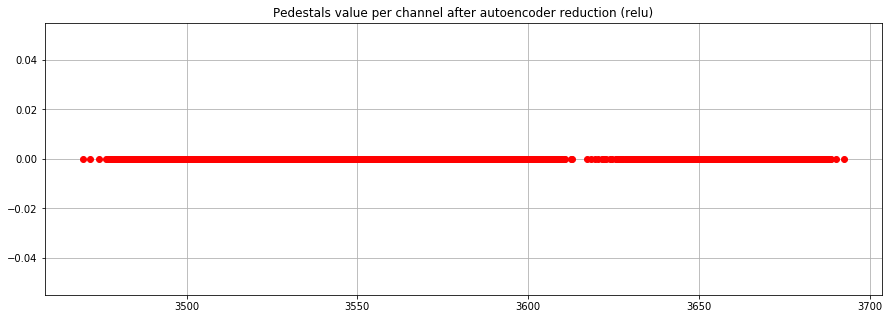

In [91]:
fig, ax = plt.subplots()
ax.set_title('Pedestals value per channel after autoencoder reduction (relu)')

for file in data_files:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("pedestal")]
    data2 = data.loc[:, 2:2049]

    data2.index = module_names()
    data2.columns = range(2048)

    data_test = data2.T
    
    Zenc = chanell_encoder.predict(data_test) 

    ax.plot(Zenc[:,0], Zenc[:,1], 'ro')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

In [92]:
ncol = 84
model2 = Sequential()

# Encoder Layers
model2.add(Dense(64, activation = 'softmax', input_shape=(ncol,)))
model2.add(Dense(44, activation = 'softmax'))
model2.add(Dense(24, activation = 'softmax'))
model2.add(Dense(14, activation = 'softmax'))
model2.add(Dense(8 , activation = 'softmax'))
model2.add(Dense(4 , activation = 'softmax'))
model2.add(Dense(2 , activation = 'softmax', name="bottleneck"))

# Decoder Layers
model2.add(Dense(4 , activation = 'softmax'))
model2.add(Dense(8 , activation = 'softmax'))
model2.add(Dense(14, activation = 'softmax'))
model2.add(Dense(24, activation = 'softmax'))
model2.add(Dense(44, activation = 'softmax'))
model2.add(Dense(64, activation = 'softmax'))
model2.add(Dense(84, activation = 'sigmoid'))

# Compile the Model
model2.compile(loss = 'mean_squared_error', optimizer = Adam())

model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_367 (Dense)            (None, 64)                5440      
_________________________________________________________________
dense_368 (Dense)            (None, 44)                2860      
_________________________________________________________________
dense_369 (Dense)            (None, 24)                1080      
_________________________________________________________________
dense_370 (Dense)            (None, 14)                350       
_________________________________________________________________
dense_371 (Dense)            (None, 8)                 120       
_________________________________________________________________
dense_372 (Dense)            (None, 4)                 36        
_________________________________________________________________
bottleneck (Dense)           (None, 2)                 10        
__________

In [93]:
for file in data_files:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("pedestal")]
    data2 = data.loc[:, 2:2049]

    data2.index = module_names()
    data2.columns = range(2048)

    data_train = data2.T
    
    model2.fit(data_train, data_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
2048/2048 [==============================] - 11s 6ms/step - loss: 270030.9199
Epoch 2/10
2048/2048 [==============================] - 0s 153us/step - loss: 270022.51170s - loss: 270025.48
Epoch 3/10
2048/2048 [==============================] - 0s 148us/step - loss: 270014.0996
Epoch 4/10
2048/2048 [==============================] - 0s 155us/step - loss: 270005.6816
Epoch 5/10
2048/2048 [==============================] - 0s 150us/step - loss: 269997.2871
Epoch 6/10
2048/2048 [==============================] - 0s 136us/step - loss: 269988.9219
Epoch 7/10
2048/2048 [==============================] - 0s 146us/step - loss: 269980.5762
Epoch 8/10
2048/2048 [==============================] - 0s 136us/step - loss: 269972.2324
Epoch 9/10
2048/2048 [==============================] - 0s 142us/step - loss: 269963.9082
Epoch 10/10
2048/2048 [==============================] - 0s 144us/step - loss: 269955.5938
Epoch 1/10
2048/2048 [==============================] - 0s 135us/step - loss: 27

2048/2048 [==============================] - 0s 142us/step - loss: 270961.4316
Epoch 2/10
2048/2048 [==============================] - 0s 142us/step - loss: 270959.9883
Epoch 3/10
2048/2048 [==============================] - 0s 127us/step - loss: 270958.5957
Epoch 4/10
2048/2048 [==============================] - 0s 130us/step - loss: 270957.2441
Epoch 5/10
2048/2048 [==============================] - 0s 130us/step - loss: 270955.9355
Epoch 6/10
2048/2048 [==============================] - 0s 132us/step - loss: 270954.6758
Epoch 7/10
2048/2048 [==============================] - 0s 132us/step - loss: 270953.4609
Epoch 8/10
2048/2048 [==============================] - 0s 127us/step - loss: 270952.2852
Epoch 9/10
2048/2048 [==============================] - 0s 125us/step - loss: 270951.1680
Epoch 10/10
2048/2048 [==============================] - 0s 133us/step - loss: 270950.0918
Epoch 1/10
2048/2048 [==============================] - 0s 146us/step - loss: 271350.8867
Epoch 2/10
2048/2048

2048/2048 [==============================] - 0s 144us/step - loss: 270545.5742
Epoch 2/10
2048/2048 [==============================] - 0s 139us/step - loss: 270545.4414
Epoch 3/10
2048/2048 [==============================] - 0s 128us/step - loss: 270545.3301
Epoch 4/10
2048/2048 [==============================] - 0s 146us/step - loss: 270545.2168
Epoch 5/10
2048/2048 [==============================] - 0s 141us/step - loss: 270545.1191
Epoch 6/10
2048/2048 [==============================] - 0s 139us/step - loss: 270545.0078
Epoch 7/10
2048/2048 [==============================] - 0s 143us/step - loss: 270544.8848
Epoch 8/10
2048/2048 [==============================] - 0s 147us/step - loss: 270544.7715
Epoch 9/10
2048/2048 [==============================] - 0s 142us/step - loss: 270544.6426
Epoch 10/10
2048/2048 [==============================] - 0s 149us/step - loss: 270544.5352
Epoch 1/10
2048/2048 [==============================] - 0s 140us/step - loss: 270853.1543
Epoch 2/10
2048/2048

2048/2048 [==============================] - 0s 140us/step - loss: 270318.0156
Epoch 2/10
2048/2048 [==============================] - 0s 127us/step - loss: 270317.9902
Epoch 3/10
2048/2048 [==============================] - 0s 139us/step - loss: 270317.9609
Epoch 4/10
2048/2048 [==============================] - 0s 132us/step - loss: 270317.9277
Epoch 5/10
2048/2048 [==============================] - 0s 135us/step - loss: 270317.8770
Epoch 6/10
2048/2048 [==============================] - 0s 135us/step - loss: 270317.8359
Epoch 7/10
2048/2048 [==============================] - 0s 136us/step - loss: 270317.7910
Epoch 8/10
2048/2048 [==============================] - 0s 143us/step - loss: 270317.7480
Epoch 9/10
2048/2048 [==============================] - 0s 137us/step - loss: 270317.7129
Epoch 10/10
2048/2048 [==============================] - 0s 135us/step - loss: 270317.6797
Epoch 1/10
2048/2048 [==============================] - 0s 132us/step - loss: 270971.5957
Epoch 2/10
2048/2048

2048/2048 [==============================] - 0s 156us/step - loss: 270920.8555
Epoch 2/10
2048/2048 [==============================] - 0s 135us/step - loss: 270920.8496
Epoch 3/10
2048/2048 [==============================] - ETA: 0s - loss: 270848.10 - 0s 124us/step - loss: 270920.8340
Epoch 4/10
2048/2048 [==============================] - 0s 133us/step - loss: 270920.8262
Epoch 5/10
2048/2048 [==============================] - 0s 126us/step - loss: 270920.7988
Epoch 6/10
2048/2048 [==============================] - 0s 139us/step - loss: 270920.7754
Epoch 7/10
2048/2048 [==============================] - 0s 134us/step - loss: 270920.7598
Epoch 8/10
2048/2048 [==============================] - 0s 138us/step - loss: 270920.7363
Epoch 9/10
2048/2048 [==============================] - 0s 138us/step - loss: 270920.7383
Epoch 10/10
2048/2048 [==============================] - 0s 124us/step - loss: 270920.7207
Epoch 1/10
2048/2048 [==============================] - 0s 133us/step - loss: 2705

In [94]:
chanell_encoder = Model(model2.input, model2.get_layer('bottleneck').output)
chanell_encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_367_input (InputLayer) (None, 84)                0         
_________________________________________________________________
dense_367 (Dense)            (None, 64)                5440      
_________________________________________________________________
dense_368 (Dense)            (None, 44)                2860      
_________________________________________________________________
dense_369 (Dense)            (None, 24)                1080      
_________________________________________________________________
dense_370 (Dense)            (None, 14)                350       
_________________________________________________________________
dense_371 (Dense)            (None, 8)                 120       
_________________________________________________________________
dense_372 (Dense)            (None, 4)                 36        
__________

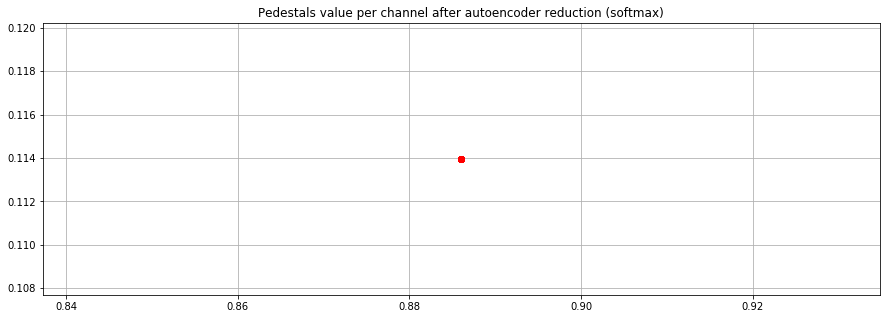

In [95]:
fig, ax = plt.subplots()
ax.set_title('Pedestals value per channel after autoencoder reduction (softmax)')

for file in data_files:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("pedestal")]
    data2 = data.loc[:, 2:2049]

    data2.index = module_names()
    data2.columns = range(2048)

    data_test = data2.T
    
    Zenc = chanell_encoder.predict(data_test) 

    ax.plot(Zenc[:,0], Zenc[:,1], 'ro')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

In [12]:
ncol = 84
model3 = Sequential()

# Encoder Layers
model3.add(Dense(64, activation = 'elu', input_shape=(ncol,)))
model3.add(Dense(44, activation = 'elu'))
model3.add(Dense(24, activation = 'elu'))
model3.add(Dense(14, activation = 'elu'))
model3.add(Dense(8 , activation = 'elu'))
model3.add(Dense(4 , activation = 'elu'))
model3.add(Dense(2 , activation = 'elu', name="bottleneck"))

# Decoder Layers
model3.add(Dense(4 , activation = 'elu'))
model3.add(Dense(8 , activation = 'elu'))
model3.add(Dense(14, activation = 'elu'))
model3.add(Dense(24, activation = 'elu'))
model3.add(Dense(44, activation = 'elu'))
model3.add(Dense(64, activation = 'elu'))
model3.add(Dense(84, activation = 'sigmoid'))

# Compile the Model
model3.compile(loss = 'mean_squared_error', optimizer = Adam())

model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 64)                5440      
_________________________________________________________________
dense_28 (Dense)             (None, 44)                2860      
_________________________________________________________________
dense_29 (Dense)             (None, 24)                1080      
_________________________________________________________________
dense_30 (Dense)             (None, 14)                350       
_________________________________________________________________
dense_31 (Dense)             (None, 8)                 120       
_________________________________________________________________
dense_32 (Dense)             (None, 4)                 36        
_________________________________________________________________
bottleneck (Dense)           (None, 2)                 10        
__________

In [13]:
for file in data_files:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("pedestal")]
    data2 = data.loc[:, 2:2049]

    data2.index = module_names()
    data2.columns = range(2048)

    data_train = data2.T
    
    model3.fit(data_train, data_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
2048/2048 [==============================] - 1s 631us/step - loss: 269761.2305
Epoch 2/10
2048/2048 [==============================] - 0s 43us/step - loss: 269598.6738
Epoch 3/10
2048/2048 [==============================] - ETA: 0s - loss: 269481.15 - 0s 42us/step - loss: 269583.1934
Epoch 4/10
2048/2048 [==============================] - 0s 43us/step - loss: 269576.4023
Epoch 5/10
2048/2048 [==============================] - 0s 61us/step - loss: 269576.3555
Epoch 6/10
2048/2048 [==============================] - 0s 48us/step - loss: 269576.3516
Epoch 7/10
2048/2048 [==============================] - 0s 44us/step - loss: 269576.3516
Epoch 8/10
2048/2048 [==============================] - 0s 51us/step - loss: 269576.3574
Epoch 9/10
2048/2048 [==============================] - 0s 41us/step - loss: 269576.3555
Epoch 10/10
2048/2048 [==============================] - 0s 36us/step - loss: 269576.3535
Epoch 1/10
2048/2048 [==============================] - 0s 31us/step - loss: 269

2048/2048 [==============================] - 0s 30us/step - loss: 270971.6406
Epoch 3/10
2048/2048 [==============================] - 0s 29us/step - loss: 270971.6387
Epoch 4/10
2048/2048 [==============================] - 0s 32us/step - loss: 270971.6465
Epoch 5/10
2048/2048 [==============================] - 0s 31us/step - loss: 270971.6504
Epoch 6/10
2048/2048 [==============================] - 0s 35us/step - loss: 270971.6484
Epoch 7/10
2048/2048 [==============================] - 0s 31us/step - loss: 270971.6484
Epoch 8/10
2048/2048 [==============================] - 0s 30us/step - loss: 270971.6445
Epoch 9/10
2048/2048 [==============================] - 0s 39us/step - loss: 270971.6387
Epoch 10/10
2048/2048 [==============================] - 0s 31us/step - loss: 270971.6367
Epoch 1/10
2048/2048 [==============================] - 0s 42us/step - loss: 271373.4883
Epoch 2/10
2048/2048 [==============================] - 0s 41us/step - loss: 271373.4980
Epoch 3/10
2048/2048 [=========

2048/2048 [==============================] - 0s 31us/step - loss: 270571.7969
Epoch 5/10
2048/2048 [==============================] - 0s 33us/step - loss: 270571.7969
Epoch 6/10
2048/2048 [==============================] - 0s 45us/step - loss: 270571.8008
Epoch 7/10
2048/2048 [==============================] - 0s 45us/step - loss: 270571.8027
Epoch 8/10
2048/2048 [==============================] - 0s 43us/step - loss: 270571.7988
Epoch 9/10
2048/2048 [==============================] - 0s 33us/step - loss: 270571.7969
Epoch 10/10
2048/2048 [==============================] - 0s 30us/step - loss: 270571.8008
Epoch 1/10
2048/2048 [==============================] - 0s 30us/step - loss: 270880.5352
Epoch 2/10
2048/2048 [==============================] - 0s 32us/step - loss: 270880.5352
Epoch 3/10
2048/2048 [==============================] - 0s 30us/step - loss: 270880.5371
Epoch 4/10
2048/2048 [==============================] - 0s 40us/step - loss: 270880.5293
Epoch 5/10
2048/2048 [=========

2048/2048 [==============================] - 0s 31us/step - loss: 270350.6172
Epoch 6/10
2048/2048 [==============================] - 0s 30us/step - loss: 270350.6113
Epoch 7/10
2048/2048 [==============================] - 0s 31us/step - loss: 270350.6191
Epoch 8/10
2048/2048 [==============================] - 0s 29us/step - loss: 270350.6133
Epoch 9/10
2048/2048 [==============================] - 0s 29us/step - loss: 270350.6172
Epoch 10/10
2048/2048 [==============================] - 0s 29us/step - loss: 270350.6152
Epoch 1/10
2048/2048 [==============================] - 0s 31us/step - loss: 271004.5957
Epoch 2/10
2048/2048 [==============================] - 0s 33us/step - loss: 271004.5938
Epoch 3/10
2048/2048 [==============================] - 0s 31us/step - loss: 271004.5957
Epoch 4/10
2048/2048 [==============================] - 0s 31us/step - loss: 271004.5938
Epoch 5/10
2048/2048 [==============================] - 0s 30us/step - loss: 271004.5957
Epoch 6/10
2048/2048 [=========

2048/2048 [==============================] - 0s 30us/step - loss: 270955.8418
Epoch 7/10
2048/2048 [==============================] - 0s 31us/step - loss: 270955.8379
Epoch 8/10
2048/2048 [==============================] - 0s 27us/step - loss: 270955.8398
Epoch 9/10
2048/2048 [==============================] - 0s 31us/step - loss: 270955.8477
Epoch 10/10
2048/2048 [==============================] - 0s 31us/step - loss: 270955.8457
Epoch 1/10
2048/2048 [==============================] - 0s 28us/step - loss: 270618.4902
Epoch 2/10
2048/2048 [==============================] - 0s 28us/step - loss: 270618.4961
Epoch 3/10
2048/2048 [==============================] - 0s 28us/step - loss: 270618.4980
Epoch 4/10
2048/2048 [==============================] - 0s 29us/step - loss: 270618.4883
Epoch 5/10
2048/2048 [==============================] - 0s 28us/step - loss: 270618.4902
Epoch 6/10
2048/2048 [==============================] - 0s 34us/step - loss: 270618.4980
Epoch 7/10
2048/2048 [=========

In [14]:
chanell_encoder = Model(model3.input, model3.get_layer('bottleneck').output)
chanell_encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27_input (InputLayer)  (None, 84)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 64)                5440      
_________________________________________________________________
dense_28 (Dense)             (None, 44)                2860      
_________________________________________________________________
dense_29 (Dense)             (None, 24)                1080      
_________________________________________________________________
dense_30 (Dense)             (None, 14)                350       
_________________________________________________________________
dense_31 (Dense)             (None, 8)                 120       
_________________________________________________________________
dense_32 (Dense)             (None, 4)                 36        
__________

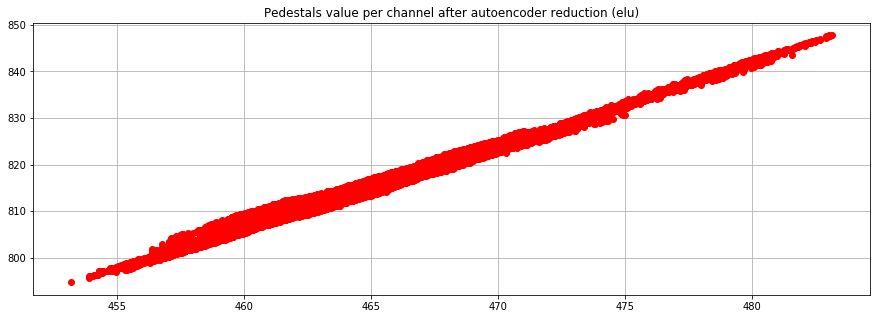

In [15]:
fig, ax = plt.subplots()
ax.set_title('Pedestals value per channel after autoencoder reduction (elu)')

for file in data_files:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("pedestal")]
    data2 = data.loc[:, 2:2049]

    data2.index = module_names()
    data2.columns = range(2048)

    data_test = data2.T
    
    Zenc = chanell_encoder.predict(data_test) 

    ax.plot(Zenc[:,0], Zenc[:,1], 'ro')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

In [96]:
ncol = 84
model4 = Sequential()

# Encoder Layers
model4.add(Dense(64, activation = 'selu', input_shape=(ncol,)))
model4.add(Dense(44, activation = 'selu'))
model4.add(Dense(24, activation = 'selu'))
model4.add(Dense(14, activation = 'selu'))
model4.add(Dense(8 , activation = 'selu'))
model4.add(Dense(4 , activation = 'selu'))
model4.add(Dense(2 , activation = 'selu', name="bottleneck"))

# Decoder Layers
model4.add(Dense(4 , activation = 'selu'))
model4.add(Dense(8 , activation = 'selu'))
model4.add(Dense(14, activation = 'selu'))
model4.add(Dense(24, activation = 'selu'))
model4.add(Dense(44, activation = 'selu'))
model4.add(Dense(64, activation = 'selu'))
model4.add(Dense(84, activation = 'sigmoid'))

# Compile the Model
model4.compile(loss = 'mean_squared_error', optimizer = Adam())

model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_380 (Dense)            (None, 64)                5440      
_________________________________________________________________
dense_381 (Dense)            (None, 44)                2860      
_________________________________________________________________
dense_382 (Dense)            (None, 24)                1080      
_________________________________________________________________
dense_383 (Dense)            (None, 14)                350       
_________________________________________________________________
dense_384 (Dense)            (None, 8)                 120       
_________________________________________________________________
dense_385 (Dense)            (None, 4)                 36        
_________________________________________________________________
bottleneck (Dense)           (None, 2)                 10        
__________

In [97]:
for file in data_files:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("pedestal")]
    data2 = data.loc[:, 2:2049]

    data2.index = module_names()
    data2.columns = range(2048)

    data_train = data2.T
    
    model4.fit(data_train, data_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
2048/2048 [==============================] - 7s 3ms/step - loss: 269886.9570
Epoch 2/10
2048/2048 [==============================] - 0s 99us/step - loss: 269616.0469
Epoch 3/10
2048/2048 [==============================] - 0s 102us/step - loss: 269523.3477
Epoch 4/10
2048/2048 [==============================] - 0s 95us/step - loss: 269515.6875
Epoch 5/10
2048/2048 [==============================] - 0s 101us/step - loss: 269515.1562
Epoch 6/10
2048/2048 [==============================] - 0s 99us/step - loss: 269515.0332
Epoch 7/10
2048/2048 [==============================] - 0s 103us/step - loss: 269514.9688
Epoch 8/10
2048/2048 [==============================] - 0s 99us/step - loss: 269514.9316
Epoch 9/10
2048/2048 [==============================] - 0s 98us/step - loss: 269514.8926
Epoch 10/10
2048/2048 [==============================] - 0s 107us/step - loss: 269514.8789
Epoch 1/10
2048/2048 [==============================] - 0s 96us/step - loss: 269711.9648
Epoch 2/10
2048/2

2048/2048 [==============================] - 0s 95us/step - loss: 270909.6895
Epoch 3/10
2048/2048 [==============================] - 0s 90us/step - loss: 270909.6914
Epoch 4/10
2048/2048 [==============================] - 0s 89us/step - loss: 270909.6895
Epoch 5/10
2048/2048 [==============================] - 0s 89us/step - loss: 270909.6895
Epoch 6/10
2048/2048 [==============================] - 0s 98us/step - loss: 270909.6836
Epoch 7/10
2048/2048 [==============================] - 0s 91us/step - loss: 270909.6934
Epoch 8/10
2048/2048 [==============================] - 0s 119us/step - loss: 270909.6934
Epoch 9/10
2048/2048 [==============================] - 0s 131us/step - loss: 270909.6895
Epoch 10/10
2048/2048 [==============================] - 0s 132us/step - loss: 270909.6895
Epoch 1/10
2048/2048 [==============================] - 0s 93us/step - loss: 271311.4941
Epoch 2/10
2048/2048 [==============================] - 0s 98us/step - loss: 271311.4980
Epoch 3/10
2048/2048 [======

2048/2048 [==============================] - 0s 95us/step - loss: 270534.5820
Epoch 4/10
2048/2048 [==============================] - 0s 100us/step - loss: 270534.5879
Epoch 5/10
2048/2048 [==============================] - 0s 99us/step - loss: 270534.5820
Epoch 6/10
2048/2048 [==============================] - 0s 91us/step - loss: 270534.5840
Epoch 7/10
2048/2048 [==============================] - 0s 95us/step - loss: 270534.5820
Epoch 8/10
2048/2048 [==============================] - 0s 93us/step - loss: 270534.5840
Epoch 9/10
2048/2048 [==============================] - 0s 94us/step - loss: 270534.5781
Epoch 10/10
2048/2048 [==============================] - 0s 90us/step - loss: 270534.5840
Epoch 1/10
2048/2048 [==============================] - 0s 99us/step - loss: 270843.3164
Epoch 2/10
2048/2048 [==============================] - 0s 93us/step - loss: 270843.3184
Epoch 3/10
2048/2048 [==============================] - 0s 124us/step - loss: 270843.3164
Epoch 4/10
2048/2048 [=======

2048/2048 [==============================] - 0s 101us/step - loss: 270313.4199
Epoch 5/10
2048/2048 [==============================] - 0s 95us/step - loss: 270313.4238
Epoch 6/10
2048/2048 [==============================] - 0s 101us/step - loss: 270313.4258
Epoch 7/10
2048/2048 [==============================] - 0s 101us/step - loss: 270313.4277
Epoch 8/10
2048/2048 [==============================] - 0s 101us/step - loss: 270313.4297
Epoch 9/10
2048/2048 [==============================] - 0s 97us/step - loss: 270313.4297
Epoch 10/10
2048/2048 [==============================] - 0s 123us/step - loss: 270313.4238
Epoch 1/10
2048/2048 [==============================] - 0s 120us/step - loss: 270967.3633
Epoch 2/10
2048/2048 [==============================] - 0s 97us/step - loss: 270967.3691
Epoch 3/10
2048/2048 [==============================] - 0s 92us/step - loss: 270967.3633
Epoch 4/10
2048/2048 [==============================] - 0s 102us/step - loss: 270967.3613
Epoch 5/10
2048/2048 [==

Epoch 5/10
2048/2048 [==============================] - 0s 80us/step - loss: 270918.6074
Epoch 6/10
2048/2048 [==============================] - 0s 78us/step - loss: 270918.6133
Epoch 7/10
2048/2048 [==============================] - 0s 78us/step - loss: 270918.6094
Epoch 8/10
2048/2048 [==============================] - 0s 82us/step - loss: 270918.6055
Epoch 9/10
2048/2048 [==============================] - 0s 79us/step - loss: 270918.6035
Epoch 10/10
2048/2048 [==============================] - 0s 83us/step - loss: 270918.6016
Epoch 1/10
2048/2048 [==============================] - 0s 89us/step - loss: 270581.2852
Epoch 2/10
2048/2048 [==============================] - 0s 114us/step - loss: 270581.2773
Epoch 3/10
2048/2048 [==============================] - 0s 83us/step - loss: 270581.2793
Epoch 4/10
2048/2048 [==============================] - 0s 80us/step - loss: 270581.2812
Epoch 5/10
2048/2048 [==============================] - 0s 80us/step - loss: 270581.2812
Epoch 6/10
2048/204

In [98]:
chanell_encoder = Model(model4.input, model4.get_layer('bottleneck').output)
chanell_encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_380_input (InputLayer) (None, 84)                0         
_________________________________________________________________
dense_380 (Dense)            (None, 64)                5440      
_________________________________________________________________
dense_381 (Dense)            (None, 44)                2860      
_________________________________________________________________
dense_382 (Dense)            (None, 24)                1080      
_________________________________________________________________
dense_383 (Dense)            (None, 14)                350       
_________________________________________________________________
dense_384 (Dense)            (None, 8)                 120       
_________________________________________________________________
dense_385 (Dense)            (None, 4)                 36        
__________

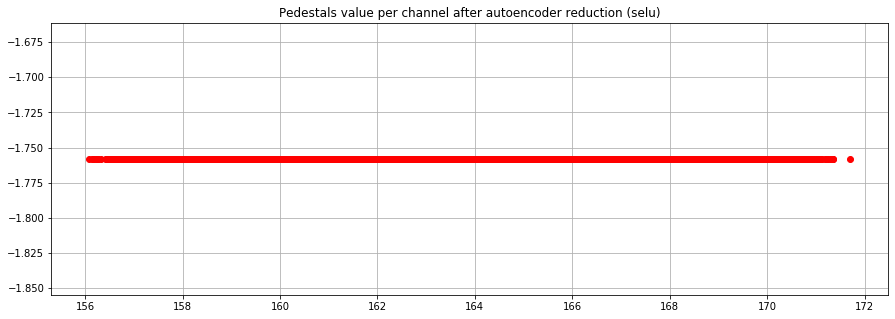

In [99]:
fig, ax = plt.subplots()
ax.set_title('Pedestals value per channel after autoencoder reduction (selu)')

for file in data_files:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("pedestal")]
    data2 = data.loc[:, 2:2049]

    data2.index = module_names()
    data2.columns = range(2048)

    data_test = data2.T
    
    Zenc = chanell_encoder.predict(data_test) 

    ax.plot(Zenc[:,0], Zenc[:,1], 'ro')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

In [112]:
ncol = 84
model5 = Sequential()

# Encoder Layers
model5.add(Dense(64, activation = 'tanh', input_shape=(ncol,)))
model5.add(Dense(44, activation = 'tanh'))
model5.add(Dense(24, activation = 'tanh'))
model5.add(Dense(14, activation = 'tanh'))
model5.add(Dense(8 , activation = 'tanh'))
model5.add(Dense(4 , activation = 'tanh'))
model5.add(Dense(2 , activation = 'tanh', name="bottleneck"))

# Decoder Layers
model5.add(Dense(4 , activation = 'tanh'))
model5.add(Dense(8 , activation = 'tanh'))
model5.add(Dense(14, activation = 'tanh'))
model5.add(Dense(24, activation = 'tanh'))
model5.add(Dense(44, activation = 'tanh'))
model5.add(Dense(64, activation = 'tanh'))
model5.add(Dense(84, activation = 'sigmoid'))

# Compile the Model
model5.compile(loss = 'mean_squared_error', optimizer = Adam())

model5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_423 (Dense)            (None, 64)                5440      
_________________________________________________________________
dense_424 (Dense)            (None, 44)                2860      
_________________________________________________________________
dense_425 (Dense)            (None, 24)                1080      
_________________________________________________________________
dense_426 (Dense)            (None, 14)                350       
_________________________________________________________________
dense_427 (Dense)            (None, 8)                 120       
_________________________________________________________________
dense_428 (Dense)            (None, 4)                 36        
_________________________________________________________________
bottleneck (Dense)           (None, 2)                 10        
__________

In [113]:
for file in data_files:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("pedestal")]
    data2 = data.loc[:, 2:2049]

    data2.index = module_names()
    data2.columns = range(2048)

    data_train = data2.T
    
    model5.fit(data_train, data_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
2048/2048 [==============================] - 6s 3ms/step - loss: 270000.2637
Epoch 2/10
2048/2048 [==============================] - 0s 82us/step - loss: 269834.0898
Epoch 3/10
2048/2048 [==============================] - 0s 79us/step - loss: 269624.4258
Epoch 4/10
2048/2048 [==============================] - 0s 96us/step - loss: 269549.1426
Epoch 5/10
2048/2048 [==============================] - 0s 95us/step - loss: 269531.7441
Epoch 6/10
2048/2048 [==============================] - 0s 98us/step - loss: 269526.0273
Epoch 7/10
2048/2048 [==============================] - 0s 96us/step - loss: 269523.2910
Epoch 8/10
2048/2048 [==============================] - 0s 86us/step - loss: 269521.6309
Epoch 9/10
2048/2048 [==============================] - 0s 81us/step - loss: 269520.4883
Epoch 10/10
2048/2048 [==============================] - 0s 79us/step - loss: 269519.6582
Epoch 1/10
2048/2048 [==============================] - 0s 83us/step - loss: 269716.0859
Epoch 2/10
2048/2048 

Epoch 3/10
2048/2048 [==============================] - 0s 75us/step - loss: 270909.9844
Epoch 4/10
2048/2048 [==============================] - 0s 71us/step - loss: 270909.9805
Epoch 5/10
2048/2048 [==============================] - 0s 73us/step - loss: 270909.9844
Epoch 6/10
2048/2048 [==============================] - 0s 73us/step - loss: 270909.9824
Epoch 7/10
2048/2048 [==============================] - 0s 74us/step - loss: 270909.9805
Epoch 8/10
2048/2048 [==============================] - 0s 79us/step - loss: 270909.9766
Epoch 9/10
2048/2048 [==============================] - 0s 75us/step - loss: 270909.9844
Epoch 10/10
2048/2048 [==============================] - 0s 73us/step - loss: 270909.9824
Epoch 1/10
2048/2048 [==============================] - 0s 98us/step - loss: 271311.7891
Epoch 2/10
2048/2048 [==============================] - 0s 81us/step - loss: 271311.7930
Epoch 3/10
2048/2048 [==============================] - 0s 77us/step - loss: 271311.7949
Epoch 4/10
2048/2048

2048/2048 [==============================] - 0s 79us/step - loss: 270534.8086
Epoch 5/10
2048/2048 [==============================] - 0s 74us/step - loss: 270534.7988
Epoch 6/10
2048/2048 [==============================] - 0s 73us/step - loss: 270534.7891
Epoch 7/10
2048/2048 [==============================] - 0s 77us/step - loss: 270534.7930
Epoch 8/10
2048/2048 [==============================] - 0s 73us/step - loss: 270534.7930
Epoch 9/10
2048/2048 [==============================] - 0s 74us/step - loss: 270534.7910
Epoch 10/10
2048/2048 [==============================] - 0s 74us/step - loss: 270534.7949
Epoch 1/10
2048/2048 [==============================] - 0s 79us/step - loss: 270843.5176
Epoch 2/10
2048/2048 [==============================] - 0s 73us/step - loss: 270843.5234
Epoch 3/10
2048/2048 [==============================] - 0s 75us/step - loss: 270843.5254
Epoch 4/10
2048/2048 [==============================] - 0s 76us/step - loss: 270843.5273
Epoch 5/10
2048/2048 [=========

2048/2048 [==============================] - 0s 77us/step - loss: 270313.4531
Epoch 6/10
2048/2048 [==============================] - 0s 73us/step - loss: 270313.4551
Epoch 7/10
2048/2048 [==============================] - 0s 73us/step - loss: 270313.4492
Epoch 8/10
2048/2048 [==============================] - 0s 78us/step - loss: 270313.4453
Epoch 9/10
2048/2048 [==============================] - 0s 74us/step - loss: 270313.4453
Epoch 10/10
2048/2048 [==============================] - 0s 75us/step - loss: 270313.4492
Epoch 1/10
2048/2048 [==============================] - 0s 78us/step - loss: 270967.3789
Epoch 2/10
2048/2048 [==============================] - 0s 71us/step - loss: 270967.3867
Epoch 3/10
2048/2048 [==============================] - 0s 76us/step - loss: 270967.3809
Epoch 4/10
2048/2048 [==============================] - 0s 72us/step - loss: 270967.3809
Epoch 5/10
2048/2048 [==============================] - 0s 74us/step - loss: 270967.3789
Epoch 6/10
2048/2048 [=========

2048/2048 [==============================] - 0s 75us/step - loss: 270918.6113
Epoch 8/10
2048/2048 [==============================] - 0s 75us/step - loss: 270918.6055
Epoch 9/10
2048/2048 [==============================] - 0s 72us/step - loss: 270918.6113
Epoch 10/10
2048/2048 [==============================] - 0s 77us/step - loss: 270918.6113
Epoch 1/10
2048/2048 [==============================] - 0s 76us/step - loss: 270581.2812
Epoch 2/10
2048/2048 [==============================] - 0s 72us/step - loss: 270581.2773
Epoch 3/10
2048/2048 [==============================] - 0s 78us/step - loss: 270581.2773
Epoch 4/10
2048/2048 [==============================] - 0s 72us/step - loss: 270581.2773
Epoch 5/10
2048/2048 [==============================] - 0s 73us/step - loss: 270581.2773
Epoch 6/10
2048/2048 [==============================] - 0s 75us/step - loss: 270581.2773
Epoch 7/10
2048/2048 [==============================] - 0s 74us/step - loss: 270581.2852
Epoch 8/10
2048/2048 [=========

In [114]:
chanell_encoder = Model(model5.input, model5.get_layer('bottleneck').output)
chanell_encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_423_input (InputLayer) (None, 84)                0         
_________________________________________________________________
dense_423 (Dense)            (None, 64)                5440      
_________________________________________________________________
dense_424 (Dense)            (None, 44)                2860      
_________________________________________________________________
dense_425 (Dense)            (None, 24)                1080      
_________________________________________________________________
dense_426 (Dense)            (None, 14)                350       
_________________________________________________________________
dense_427 (Dense)            (None, 8)                 120       
_________________________________________________________________
dense_428 (Dense)            (None, 4)                 36        
__________

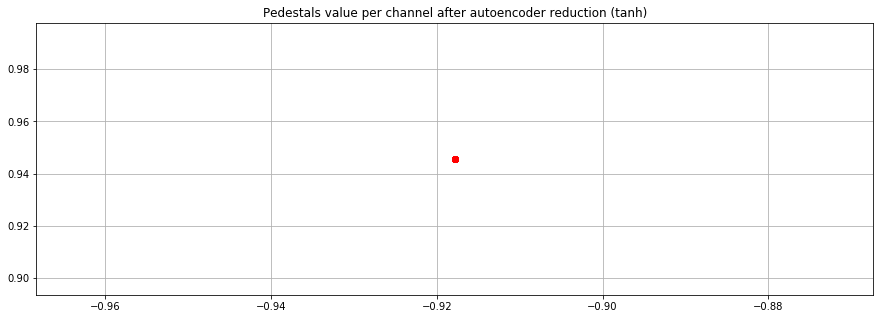

In [115]:
fig, ax = plt.subplots()
ax.set_title('Pedestals value per channel after autoencoder reduction (tanh)')

for file in data_files:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("pedestal")]
    data2 = data.loc[:, 2:2049]

    data2.index = module_names()
    data2.columns = range(2048)

    data_test = data2.T
    
    Zenc = chanell_encoder.predict(data_test) 

    ax.plot(Zenc[:,0], Zenc[:,1], 'ro')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

In [24]:
ncol = 84
model6 = Sequential()

# Encoder Layers
model6.add(Dense(64, activation = 'sigmoid', input_shape=(ncol,)))
model6.add(Dense(44, activation = 'sigmoid'))
model6.add(Dense(24, activation = 'sigmoid'))
model6.add(Dense(14, activation = 'sigmoid'))
model6.add(Dense(8 , activation = 'sigmoid'))
model6.add(Dense(4 , activation = 'sigmoid'))
model6.add(Dense(2 , activation = 'sigmoid', name="bottleneck"))

# Decoder Layers
model6.add(Dense(4 , activation = 'sigmoid'))
model6.add(Dense(8 , activation = 'sigmoid'))
model6.add(Dense(14, activation = 'sigmoid'))
model6.add(Dense(24, activation = 'sigmoid'))
model6.add(Dense(44, activation = 'sigmoid'))
model6.add(Dense(64, activation = 'sigmoid'))
model6.add(Dense(84, activation = 'sigmoid'))

# Compile the Model
model6.compile(loss = 'mean_squared_error', optimizer = Adam())

model6.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 64)                5440      
_________________________________________________________________
dense_67 (Dense)             (None, 44)                2860      
_________________________________________________________________
dense_68 (Dense)             (None, 24)                1080      
_________________________________________________________________
dense_69 (Dense)             (None, 14)                350       
_________________________________________________________________
dense_70 (Dense)             (None, 8)                 120       
_________________________________________________________________
dense_71 (Dense)             (None, 4)                 36        
_________________________________________________________________
bottleneck (Dense)           (None, 2)                 10        
__________

In [25]:
for file in data_files:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("pedestal")]
    data2 = data.loc[:, 2:2049]

    data2.index = module_names()
    data2.columns = range(2048)

    data_train = data2.T
    
    model6.fit(data_train, data_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
2048/2048 [==============================] - 2s 1ms/step - loss: 269984.4570
Epoch 2/10
2048/2048 [==============================] - 0s 38us/step - loss: 269840.2715
Epoch 3/10
2048/2048 [==============================] - 0s 36us/step - loss: 269700.3418
Epoch 4/10
2048/2048 [==============================] - 0s 38us/step - loss: 269603.8301
Epoch 5/10
2048/2048 [==============================] - 0s 37us/step - loss: 269558.6504
Epoch 6/10
2048/2048 [==============================] - 0s 37us/step - loss: 269540.5488
Epoch 7/10
2048/2048 [==============================] - ETA: 0s - loss: 269548.61 - 0s 38us/step - loss: 269532.5059
Epoch 8/10
2048/2048 [==============================] - 0s 38us/step - loss: 269528.1875
Epoch 9/10
2048/2048 [==============================] - 0s 37us/step - loss: 269525.5234
Epoch 10/10
2048/2048 [==============================] - 0s 37us/step - loss: 269523.6797
Epoch 1/10
2048/2048 [==============================] - 0s 36us/step - loss: 26971

2048/2048 [==============================] - 0s 42us/step - loss: 270910.0039
Epoch 3/10
2048/2048 [==============================] - 0s 43us/step - loss: 270910.0039
Epoch 4/10
2048/2048 [==============================] - 0s 45us/step - loss: 270910.0098
Epoch 5/10
2048/2048 [==============================] - 0s 43us/step - loss: 270910.0059
Epoch 6/10
2048/2048 [==============================] - 0s 43us/step - loss: 270910.0117
Epoch 7/10
2048/2048 [==============================] - 0s 39us/step - loss: 270910.0137
Epoch 8/10
2048/2048 [==============================] - 0s 39us/step - loss: 270910.0039
Epoch 9/10
2048/2048 [==============================] - 0s 38us/step - loss: 270909.9980
Epoch 10/10
2048/2048 [==============================] - 0s 36us/step - loss: 270909.9902
Epoch 1/10
2048/2048 [==============================] - 0s 39us/step - loss: 271311.8047
Epoch 2/10
2048/2048 [==============================] - 0s 42us/step - loss: 271311.8027
Epoch 3/10
2048/2048 [=========

2048/2048 [==============================] - 0s 47us/step - loss: 270534.8457
Epoch 5/10
2048/2048 [==============================] - 0s 46us/step - loss: 270534.8516
Epoch 6/10
2048/2048 [==============================] - 0s 62us/step - loss: 270534.8457
Epoch 7/10
2048/2048 [==============================] - 0s 47us/step - loss: 270534.8535
Epoch 8/10
2048/2048 [==============================] - 0s 52us/step - loss: 270534.8535
Epoch 9/10
2048/2048 [==============================] - 0s 49us/step - loss: 270534.8535
Epoch 10/10
2048/2048 [==============================] - 0s 63us/step - loss: 270534.8477
Epoch 1/10
2048/2048 [==============================] - 0s 48us/step - loss: 270843.5820
Epoch 2/10
2048/2048 [==============================] - 0s 51us/step - loss: 270843.5859
Epoch 3/10
2048/2048 [==============================] - 0s 50us/step - loss: 270843.5859
Epoch 4/10
2048/2048 [==============================] - 0s 53us/step - loss: 270843.5801
Epoch 5/10
2048/2048 [=========

2048/2048 [==============================] - 0s 76us/step - loss: 270313.4980
Epoch 6/10
2048/2048 [==============================] - 0s 80us/step - loss: 270313.5039
Epoch 7/10
2048/2048 [==============================] - 0s 74us/step - loss: 270313.5000
Epoch 8/10
2048/2048 [==============================] - 0s 60us/step - loss: 270313.5059
Epoch 9/10
2048/2048 [==============================] - 0s 50us/step - loss: 270313.5020
Epoch 10/10
2048/2048 [==============================] - 0s 51us/step - loss: 270313.4902
Epoch 1/10
2048/2048 [==============================] - 0s 38us/step - loss: 270967.4219
Epoch 2/10
2048/2048 [==============================] - 0s 40us/step - loss: 270967.4082
Epoch 3/10
2048/2048 [==============================] - 0s 41us/step - loss: 270967.4043
Epoch 4/10
2048/2048 [==============================] - 0s 40us/step - loss: 270967.4141
Epoch 5/10
2048/2048 [==============================] - 0s 40us/step - loss: 270967.4102
Epoch 6/10
2048/2048 [=========

2048/2048 [==============================] - 0s 36us/step - loss: 270918.6113
Epoch 8/10
2048/2048 [==============================] - 0s 35us/step - loss: 270918.6074
Epoch 9/10
2048/2048 [==============================] - 0s 36us/step - loss: 270918.6094
Epoch 10/10
2048/2048 [==============================] - 0s 35us/step - loss: 270918.6113
Epoch 1/10
2048/2048 [==============================] - 0s 38us/step - loss: 270581.2734
Epoch 2/10
2048/2048 [==============================] - 0s 39us/step - loss: 270581.2734
Epoch 3/10
2048/2048 [==============================] - 0s 35us/step - loss: 270581.2754
Epoch 4/10
2048/2048 [==============================] - 0s 39us/step - loss: 270581.2832
Epoch 5/10
2048/2048 [==============================] - 0s 38us/step - loss: 270581.2832
Epoch 6/10
2048/2048 [==============================] - 0s 37us/step - loss: 270581.2793
Epoch 7/10
2048/2048 [==============================] - 0s 38us/step - loss: 270581.2754
Epoch 8/10
2048/2048 [=========

In [26]:
chanell_encoder = Model(model6.input, model6.get_layer('bottleneck').output)
chanell_encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66_input (InputLayer)  (None, 84)                0         
_________________________________________________________________
dense_66 (Dense)             (None, 64)                5440      
_________________________________________________________________
dense_67 (Dense)             (None, 44)                2860      
_________________________________________________________________
dense_68 (Dense)             (None, 24)                1080      
_________________________________________________________________
dense_69 (Dense)             (None, 14)                350       
_________________________________________________________________
dense_70 (Dense)             (None, 8)                 120       
_________________________________________________________________
dense_71 (Dense)             (None, 4)                 36        
__________

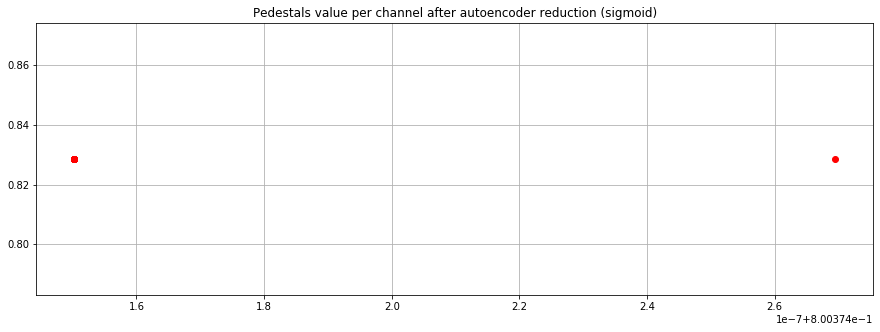

In [27]:
fig, ax = plt.subplots()
ax.set_title('Pedestals value per channel after autoencoder reduction (sigmoid)')

for file in data_files:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("pedestal")]
    data2 = data.loc[:, 2:2049]

    data2.index = module_names()
    data2.columns = range(2048)

    data_test = data2.T
    
    Zenc = chanell_encoder.predict(data_test) 

    ax.plot(Zenc[:,0], Zenc[:,1], 'ro')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

In [28]:
ncol = 84
model7 = Sequential()

# Encoder Layers
model7.add(Dense(64, activation = 'exponential', input_shape=(ncol,)))
model7.add(Dense(44, activation = 'exponential'))
model7.add(Dense(24, activation = 'exponential'))
model7.add(Dense(14, activation = 'exponential'))
model7.add(Dense(8 , activation = 'exponential'))
model7.add(Dense(4 , activation = 'exponential'))
model7.add(Dense(2 , activation = 'exponential', name="bottleneck"))

# Decoder Layers
model7.add(Dense(4 , activation = 'exponential'))
model7.add(Dense(8 , activation = 'exponential'))
model7.add(Dense(14, activation = 'exponential'))
model7.add(Dense(24, activation = 'exponential'))
model7.add(Dense(44, activation = 'exponential'))
model7.add(Dense(64, activation = 'exponential'))
model7.add(Dense(84, activation = 'sigmoid'))

# Compile the Model
model7.compile(loss = 'mean_squared_error', optimizer = Adam())

model7.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_79 (Dense)             (None, 64)                5440      
_________________________________________________________________
dense_80 (Dense)             (None, 44)                2860      
_________________________________________________________________
dense_81 (Dense)             (None, 24)                1080      
_________________________________________________________________
dense_82 (Dense)             (None, 14)                350       
_________________________________________________________________
dense_83 (Dense)             (None, 8)                 120       
_________________________________________________________________
dense_84 (Dense)             (None, 4)                 36        
_________________________________________________________________
bottleneck (Dense)           (None, 2)                 10        
__________

In [29]:
for file in data_files:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("pedestal")]
    data2 = data.loc[:, 2:2049]

    data2.index = module_names()
    data2.columns = range(2048)

    data_train = data2.T
    
    model7.fit(data_train, data_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
2048/2048 [==============================] - 2s 1ms/step - loss: nan
Epoch 2/10
2048/2048 [==============================] - 0s 35us/step - loss: nan
Epoch 3/10
2048/2048 [==============================] - 0s 36us/step - loss: nan
Epoch 4/10
2048/2048 [==============================] - 0s 38us/step - loss: nan
Epoch 5/10
2048/2048 [==============================] - 0s 49us/step - loss: nan
Epoch 6/10
2048/2048 [==============================] - 0s 50us/step - loss: nan
Epoch 7/10
2048/2048 [==============================] - 0s 38us/step - loss: nan
Epoch 8/10
2048/2048 [==============================] - 0s 40us/step - loss: nan
Epoch 9/10
2048/2048 [==============================] - 0s 45us/step - loss: nan
Epoch 10/10
2048/2048 [==============================] - 0s 43us/step - loss: nan
Epoch 1/10
2048/2048 [==============================] - 0s 33us/step - loss: nan
Epoch 2/10
2048/2048 [==============================] - 0s 38us/step - loss: nan
Epoch 3/10
2048/2048 [======

2048/2048 [==============================] - 0s 45us/step - loss: nan
Epoch 2/10
2048/2048 [==============================] - 0s 41us/step - loss: nan
Epoch 3/10
2048/2048 [==============================] - 0s 35us/step - loss: nan
Epoch 4/10
2048/2048 [==============================] - 0s 40us/step - loss: nan
Epoch 5/10
2048/2048 [==============================] - 0s 46us/step - loss: nan
Epoch 6/10
2048/2048 [==============================] - 0s 60us/step - loss: nan
Epoch 7/10
2048/2048 [==============================] - 0s 61us/step - loss: nan
Epoch 8/10
2048/2048 [==============================] - 0s 58us/step - loss: nan
Epoch 9/10
2048/2048 [==============================] - 0s 52us/step - loss: nan
Epoch 10/10
2048/2048 [==============================] - 0s 34us/step - loss: nan
Epoch 1/10
2048/2048 [==============================] - 0s 43us/step - loss: nan
Epoch 2/10
2048/2048 [==============================] - 0s 44us/step - loss: nan
Epoch 3/10
2048/2048 [================

2048/2048 [==============================] - 0s 42us/step - loss: nan
Epoch 3/10
2048/2048 [==============================] - 0s 38us/step - loss: nan
Epoch 4/10
2048/2048 [==============================] - 0s 50us/step - loss: nan
Epoch 5/10
2048/2048 [==============================] - 0s 47us/step - loss: nan
Epoch 6/10
2048/2048 [==============================] - 0s 39us/step - loss: nan
Epoch 7/10
2048/2048 [==============================] - 0s 41us/step - loss: nan
Epoch 8/10
2048/2048 [==============================] - 0s 37us/step - loss: nan
Epoch 9/10
2048/2048 [==============================] - 0s 35us/step - loss: nan
Epoch 10/10
2048/2048 [==============================] - 0s 35us/step - loss: nan
Epoch 1/10
2048/2048 [==============================] - 0s 34us/step - loss: nan
Epoch 2/10
2048/2048 [==============================] - 0s 34us/step - loss: nan
Epoch 3/10
2048/2048 [==============================] - ETA: 0s - loss: n - 0s 43us/step - loss: nan
Epoch 4/10
2048/20

2048/2048 [==============================] - 0s 44us/step - loss: nan
Epoch 3/10
2048/2048 [==============================] - 0s 61us/step - loss: nan
Epoch 4/10
2048/2048 [==============================] - 0s 60us/step - loss: nan
Epoch 5/10
2048/2048 [==============================] - 0s 34us/step - loss: nan
Epoch 6/10
2048/2048 [==============================] - 0s 33us/step - loss: nan
Epoch 7/10
2048/2048 [==============================] - 0s 36us/step - loss: nan
Epoch 8/10
2048/2048 [==============================] - 0s 37us/step - loss: nan
Epoch 9/10
2048/2048 [==============================] - 0s 35us/step - loss: nan
Epoch 10/10
2048/2048 [==============================] - 0s 34us/step - loss: nan
Epoch 1/10
2048/2048 [==============================] - 0s 33us/step - loss: nan
Epoch 2/10
2048/2048 [==============================] - 0s 34us/step - loss: nan
Epoch 3/10
2048/2048 [==============================] - 0s 36us/step - loss: nan
Epoch 4/10
2048/2048 [================

2048/2048 [==============================] - 0s 35us/step - loss: nan
Epoch 4/10
2048/2048 [==============================] - 0s 37us/step - loss: nan
Epoch 5/10
2048/2048 [==============================] - 0s 33us/step - loss: nan
Epoch 6/10
2048/2048 [==============================] - 0s 33us/step - loss: nan
Epoch 7/10
2048/2048 [==============================] - 0s 33us/step - loss: nan
Epoch 8/10
2048/2048 [==============================] - 0s 34us/step - loss: nan
Epoch 9/10
2048/2048 [==============================] - 0s 33us/step - loss: nan
Epoch 10/10
2048/2048 [==============================] - 0s 33us/step - loss: nan
Epoch 1/10
2048/2048 [==============================] - 0s 32us/step - loss: nan
Epoch 2/10
2048/2048 [==============================] - 0s 37us/step - loss: nan
Epoch 3/10
2048/2048 [==============================] - 0s 33us/step - loss: nan
Epoch 4/10
2048/2048 [==============================] - 0s 34us/step - loss: nan
Epoch 5/10
2048/2048 [================

In [30]:
chanell_encoder = Model(model7.input, model7.get_layer('bottleneck').output)
chanell_encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_79_input (InputLayer)  (None, 84)                0         
_________________________________________________________________
dense_79 (Dense)             (None, 64)                5440      
_________________________________________________________________
dense_80 (Dense)             (None, 44)                2860      
_________________________________________________________________
dense_81 (Dense)             (None, 24)                1080      
_________________________________________________________________
dense_82 (Dense)             (None, 14)                350       
_________________________________________________________________
dense_83 (Dense)             (None, 8)                 120       
_________________________________________________________________
dense_84 (Dense)             (None, 4)                 36        
__________

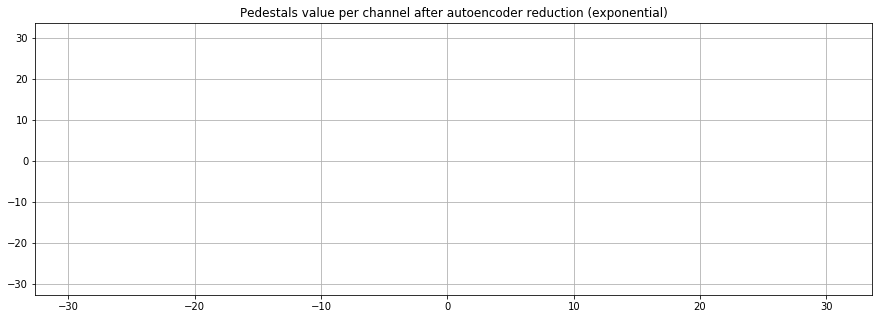

In [31]:
fig, ax = plt.subplots()
ax.set_title('Pedestals value per channel after autoencoder reduction (exponential)')

for file in data_files:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("pedestal")]
    data2 = data.loc[:, 2:2049]

    data2.index = module_names()
    data2.columns = range(2048)

    data_test = data2.T
    
    Zenc = chanell_encoder.predict(data_test) 

    ax.plot(Zenc[:,0], Zenc[:,1], 'ro')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

In [32]:
ncol = 84
model8 = Sequential()

# Encoder Layers
model8.add(Dense(64, activation = 'linear', input_shape=(ncol,)))
model8.add(Dense(44, activation = 'linear'))
model8.add(Dense(24, activation = 'linear'))
model8.add(Dense(14, activation = 'linear'))
model8.add(Dense(8 , activation = 'linear'))
model8.add(Dense(4 , activation = 'linear'))
model8.add(Dense(2 , activation = 'linear', name="bottleneck"))

# Decoder Layers
model8.add(Dense(4 , activation = 'linear'))
model8.add(Dense(8 , activation = 'linear'))
model8.add(Dense(14, activation = 'linear'))
model8.add(Dense(24, activation = 'linear'))
model8.add(Dense(44, activation = 'linear'))
model8.add(Dense(64, activation = 'linear'))
model8.add(Dense(84, activation = 'sigmoid'))

# Compile the Model
model8.compile(loss = 'mean_squared_error', optimizer = Adam())

model8.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_92 (Dense)             (None, 64)                5440      
_________________________________________________________________
dense_93 (Dense)             (None, 44)                2860      
_________________________________________________________________
dense_94 (Dense)             (None, 24)                1080      
_________________________________________________________________
dense_95 (Dense)             (None, 14)                350       
_________________________________________________________________
dense_96 (Dense)             (None, 8)                 120       
_________________________________________________________________
dense_97 (Dense)             (None, 4)                 36        
_________________________________________________________________
bottleneck (Dense)           (None, 2)                 10        
__________

In [33]:
for file in data_files:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("pedestal")]
    data2 = data.loc[:, 2:2049]

    data2.index = module_names()
    data2.columns = range(2048)

    data_train = data2.T
    
    model8.fit(data_train, data_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
2048/2048 [==============================] - 2s 948us/step - loss: 269999.6133
Epoch 2/10
2048/2048 [==============================] - 0s 33us/step - loss: 269958.5176
Epoch 3/10
2048/2048 [==============================] - 0s 35us/step - loss: 269947.7207
Epoch 4/10
2048/2048 [==============================] - 0s 38us/step - loss: 269947.7129
Epoch 5/10
2048/2048 [==============================] - 0s 34us/step - loss: 269947.7207
Epoch 6/10
2048/2048 [==============================] - 0s 34us/step - loss: 269947.7109
Epoch 7/10
2048/2048 [==============================] - 0s 35us/step - loss: 269947.7129
Epoch 8/10
2048/2048 [==============================] - 0s 35us/step - loss: 269947.7148
Epoch 9/10
2048/2048 [==============================] - 0s 34us/step - loss: 269947.7129
Epoch 10/10
2048/2048 [==============================] - 0s 41us/step - loss: 269947.7070
Epoch 1/10
2048/2048 [==============================] - 0s 35us/step - loss: 270144.9707
Epoch 2/10
2048/204

2048/2048 [==============================] - 0s 36us/step - loss: 271343.9570
Epoch 3/10
2048/2048 [==============================] - 0s 92us/step - loss: 271343.9570
Epoch 4/10
2048/2048 [==============================] - 0s 44us/step - loss: 271343.9629
Epoch 5/10
2048/2048 [==============================] - 0s 46us/step - loss: 271343.9590
Epoch 6/10
2048/2048 [==============================] - 0s 48us/step - loss: 271343.9629
Epoch 7/10
2048/2048 [==============================] - 0s 40us/step - loss: 271343.9570
Epoch 8/10
2048/2048 [==============================] - 0s 39us/step - loss: 271343.9590
Epoch 9/10
2048/2048 [==============================] - 0s 38us/step - loss: 271343.9688
Epoch 10/10
2048/2048 [==============================] - 0s 37us/step - loss: 271343.9590
Epoch 1/10
2048/2048 [==============================] - 0s 42us/step - loss: 271746.1055
Epoch 2/10
2048/2048 [==============================] - 0s 41us/step - loss: 271746.1094
Epoch 3/10
2048/2048 [=========

2048/2048 [==============================] - 0s 41us/step - loss: 270968.5059
Epoch 5/10
2048/2048 [==============================] - 0s 36us/step - loss: 270968.5078
Epoch 6/10
2048/2048 [==============================] - 0s 36us/step - loss: 270968.5078
Epoch 7/10
2048/2048 [==============================] - 0s 36us/step - loss: 270968.5059
Epoch 8/10
2048/2048 [==============================] - 0s 39us/step - loss: 270968.5059
Epoch 9/10
2048/2048 [==============================] - 0s 37us/step - loss: 270968.5059
Epoch 10/10
2048/2048 [==============================] - 0s 35us/step - loss: 270968.5039
Epoch 1/10
2048/2048 [==============================] - 0s 32us/step - loss: 271277.5059
Epoch 2/10
2048/2048 [==============================] - 0s 33us/step - loss: 271277.5020
Epoch 3/10
2048/2048 [==============================] - 0s 37us/step - loss: 271277.5039
Epoch 4/10
2048/2048 [==============================] - 0s 42us/step - loss: 271277.5020
Epoch 5/10
2048/2048 [=========

2048/2048 [==============================] - 0s 34us/step - loss: 270747.2090
Epoch 7/10
2048/2048 [==============================] - 0s 35us/step - loss: 270747.2051
Epoch 8/10
2048/2048 [==============================] - 0s 35us/step - loss: 270747.2070
Epoch 9/10
2048/2048 [==============================] - 0s 34us/step - loss: 270747.2070
Epoch 10/10
2048/2048 [==============================] - 0s 35us/step - loss: 270747.2148
Epoch 1/10
2048/2048 [==============================] - 0s 34us/step - loss: 271401.6816
Epoch 2/10
2048/2048 [==============================] - 0s 34us/step - loss: 271401.6797
Epoch 3/10
2048/2048 [==============================] - 0s 34us/step - loss: 271401.6758
Epoch 4/10
2048/2048 [==============================] - 0s 34us/step - loss: 271401.6777
Epoch 5/10
2048/2048 [==============================] - 0s 34us/step - loss: 271401.6836
Epoch 6/10
2048/2048 [==============================] - 0s 34us/step - loss: 271401.6777
Epoch 7/10
2048/2048 [=========

2048/2048 [==============================] - 0s 35us/step - loss: 271352.9629
Epoch 9/10
2048/2048 [==============================] - 0s 53us/step - loss: 271352.9629
Epoch 10/10
2048/2048 [==============================] - 0s 54us/step - loss: 271352.9590
Epoch 1/10
2048/2048 [==============================] - 0s 34us/step - loss: 271015.2852
Epoch 2/10
2048/2048 [==============================] - 0s 34us/step - loss: 271015.2832
Epoch 3/10
2048/2048 [==============================] - 0s 34us/step - loss: 271015.2852
Epoch 4/10
2048/2048 [==============================] - 0s 33us/step - loss: 271015.2871
Epoch 5/10
2048/2048 [==============================] - 0s 33us/step - loss: 271015.2891
Epoch 6/10
2048/2048 [==============================] - 0s 36us/step - loss: 271015.2832
Epoch 7/10
2048/2048 [==============================] - 0s 36us/step - loss: 271015.2812
Epoch 8/10
2048/2048 [==============================] - 0s 34us/step - loss: 271015.2852
Epoch 9/10
2048/2048 [=========

In [34]:
chanell_encoder = Model(model8.input, model8.get_layer('bottleneck').output)
chanell_encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_92_input (InputLayer)  (None, 84)                0         
_________________________________________________________________
dense_92 (Dense)             (None, 64)                5440      
_________________________________________________________________
dense_93 (Dense)             (None, 44)                2860      
_________________________________________________________________
dense_94 (Dense)             (None, 24)                1080      
_________________________________________________________________
dense_95 (Dense)             (None, 14)                350       
_________________________________________________________________
dense_96 (Dense)             (None, 8)                 120       
_________________________________________________________________
dense_97 (Dense)             (None, 4)                 36        
__________

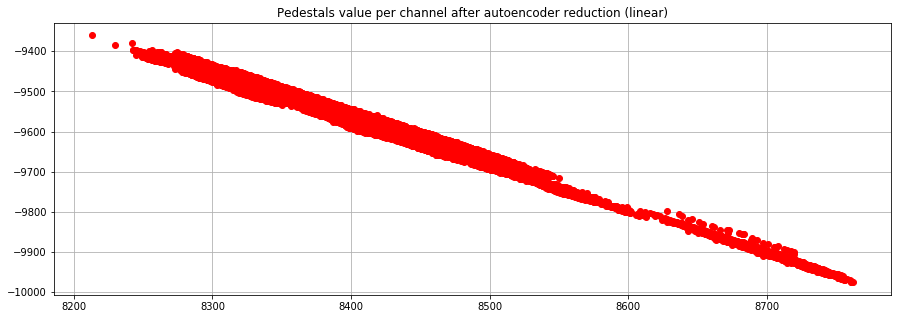

In [35]:
fig, ax = plt.subplots()
ax.set_title('Pedestals value per channel after autoencoder reduction (linear)')

for file in data_files:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("pedestal")]
    data2 = data.loc[:, 2:2049]

    data2.index = module_names()
    data2.columns = range(2048)

    data_test = data2.T
    
    Zenc = chanell_encoder.predict(data_test) 

    ax.plot(Zenc[:,0], Zenc[:,1], 'ro')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

In [36]:
ncol = 2048
model9 = Sequential()

# Encoder Layers
model9.add(Dense(2000, activation = 'elu', input_shape=(ncol,)))
model9.add(Dense(1750, activation = 'elu'))
model9.add(Dense(1500, activation = 'elu'))
model9.add(Dense(1250, activation = 'elu'))
model9.add(Dense(1000, activation = 'elu'))
model9.add(Dense(750 , activation = 'elu'))
model9.add(Dense(500 , activation = 'elu'))
model9.add(Dense(250 , activation = 'elu'))
model9.add(Dense(100 , activation = 'elu'))
model9.add(Dense(50  , activation = 'elu'))
model9.add(Dense(20  , activation = 'elu'))
model9.add(Dense(2   , activation = 'elu', name="bottleneck"))

# Decoder Layers
model9.add(Dense(20  , activation = 'elu'))
model9.add(Dense(50  , activation = 'elu'))
model9.add(Dense(100 , activation = 'elu'))
model9.add(Dense(250 , activation = 'elu'))
model9.add(Dense(500 , activation = 'elu'))
model9.add(Dense(750 , activation = 'elu'))
model9.add(Dense(1000, activation = 'elu'))
model9.add(Dense(1250, activation = 'elu'))
model9.add(Dense(1500, activation = 'elu'))
model9.add(Dense(1750, activation = 'elu'))
model9.add(Dense(2000, activation = 'elu'))
model9.add(Dense(2048, activation = 'sigmoid'))

# Compile the Model
model9.compile(loss = 'mean_squared_error', optimizer = Adam())

model9.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105 (Dense)            (None, 2000)              4098000   
_________________________________________________________________
dense_106 (Dense)            (None, 1750)              3501750   
_________________________________________________________________
dense_107 (Dense)            (None, 1500)              2626500   
_________________________________________________________________
dense_108 (Dense)            (None, 1250)              1876250   
_________________________________________________________________
dense_109 (Dense)            (None, 1000)              1251000   
_________________________________________________________________
dense_110 (Dense)            (None, 750)               750750    
_________________________________________________________________
dense_111 (Dense)            (None, 500)               375500    
__________

In [37]:
for file in data_files:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("pedestal")]
    data2 = data.loc[:, 2:2049]

    data2.index = module_names()
    data2.columns = range(2048)

    data_train = data2
    
    model9.fit(data_train, data_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
84/84 [==============================] - 20s 243ms/step - loss: 270032.5000
Epoch 2/10
84/84 [==============================] - 2s 19ms/step - loss: 269854.5312
Epoch 3/10
84/84 [==============================] - 2s 24ms/step - loss: 270143.4375
Epoch 4/10
84/84 [==============================] - 2s 29ms/step - loss: 269866.4688
Epoch 5/10
84/84 [==============================] - 3s 31ms/step - loss: 269568.1250
Epoch 6/10
84/84 [==============================] - 2s 28ms/step - loss: 269517.4375
Epoch 7/10
84/84 [==============================] - 2s 29ms/step - loss: 269514.8750
Epoch 8/10
84/84 [==============================] - 2s 29ms/step - loss: 269514.8438
Epoch 9/10
84/84 [==============================] - 3s 30ms/step - loss: 269514.8438
Epoch 10/10
84/84 [==============================] - 2s 27ms/step - loss: 269514.8438
Epoch 1/10
84/84 [==============================] - 1s 15ms/step - loss: 269711.9375
Epoch 2/10
84/84 [==============================] - 1s 16ms/st

Epoch 8/10
84/84 [==============================] - 3s 32ms/step - loss: 270910.0000
Epoch 9/10
84/84 [==============================] - 3s 31ms/step - loss: 270909.9688
Epoch 10/10
84/84 [==============================] - 3s 32ms/step - loss: 270909.9688
Epoch 1/10
84/84 [==============================] - 1s 17ms/step - loss: 271311.7500
Epoch 2/10
84/84 [==============================] - 2s 18ms/step - loss: 271311.7500
Epoch 3/10
84/84 [==============================] - 1s 18ms/step - loss: 271311.7500
Epoch 4/10
84/84 [==============================] - 1s 18ms/step - loss: 271311.7500
Epoch 5/10
84/84 [==============================] - 2s 24ms/step - loss: 271311.7812
Epoch 6/10
84/84 [==============================] - 3s 31ms/step - loss: 271311.7500
Epoch 7/10
84/84 [==============================] - 3s 31ms/step - loss: 271311.7500
Epoch 8/10
84/84 [==============================] - 3s 32ms/step - loss: 271311.7812
Epoch 9/10
84/84 [==============================] - 3s 32ms/step

Epoch 5/10
84/84 [==============================] - 1s 16ms/step - loss: 270843.5312
Epoch 6/10
84/84 [==============================] - 2s 21ms/step - loss: 270843.5312
Epoch 7/10
84/84 [==============================] - 2s 28ms/step - loss: 270843.5625
Epoch 8/10
84/84 [==============================] - 2s 28ms/step - loss: 270843.5625
Epoch 9/10
84/84 [==============================] - 2s 28ms/step - loss: 270843.5625
Epoch 10/10
84/84 [==============================] - 2s 28ms/step - loss: 270843.5625
Epoch 1/10
84/84 [==============================] - 1s 15ms/step - loss: 271051.5625
Epoch 2/10
84/84 [==============================] - 1s 16ms/step - loss: 271051.5312
Epoch 3/10
84/84 [==============================] - 1s 16ms/step - loss: 271051.5312
Epoch 4/10
84/84 [==============================] - 1s 15ms/step - loss: 271051.5625
Epoch 5/10
84/84 [==============================] - 1s 15ms/step - loss: 271051.5312
Epoch 6/10
84/84 [==============================] - 2s 23ms/step

Epoch 2/10
84/84 [==============================] - 1s 15ms/step - loss: 270768.0000
Epoch 3/10
84/84 [==============================] - 1s 15ms/step - loss: 270768.0000
Epoch 4/10
84/84 [==============================] - 1s 15ms/step - loss: 270768.0000
Epoch 5/10
84/84 [==============================] - 1s 15ms/step - loss: 270768.0312
Epoch 6/10
84/84 [==============================] - 1s 15ms/step - loss: 270768.0000
Epoch 7/10
84/84 [==============================] - 2s 18ms/step - loss: 270768.0312
Epoch 8/10
84/84 [==============================] - 1s 17ms/step - loss: 270768.0000
Epoch 9/10
84/84 [==============================] - 1s 18ms/step - loss: 270768.0312
Epoch 10/10
84/84 [==============================] - 1s 15ms/step - loss: 270768.0312
Epoch 1/10
84/84 [==============================] - 1s 13ms/step - loss: 270595.7500
Epoch 2/10
84/84 [==============================] - 1s 15ms/step - loss: 270595.7500
Epoch 3/10
84/84 [==============================] - 1s 15ms/step

Epoch 9/10
84/84 [==============================] - 1s 16ms/step - loss: 271040.4375
Epoch 10/10
84/84 [==============================] - 1s 15ms/step - loss: 271040.4688
Epoch 1/10
84/84 [==============================] - 1s 14ms/step - loss: 271099.1250
Epoch 2/10
84/84 [==============================] - 1s 13ms/step - loss: 271099.1250
Epoch 3/10
84/84 [==============================] - 1s 15ms/step - loss: 271099.0938
Epoch 4/10
84/84 [==============================] - 1s 16ms/step - loss: 271099.0938
Epoch 5/10
84/84 [==============================] - 1s 15ms/step - loss: 271099.1250
Epoch 6/10
84/84 [==============================] - 2s 19ms/step - loss: 271099.0938
Epoch 7/10
84/84 [==============================] - 1s 15ms/step - loss: 271099.0938
Epoch 8/10
84/84 [==============================] - 1s 15ms/step - loss: 271099.1250
Epoch 9/10
84/84 [==============================] - 1s 15ms/step - loss: 271099.1250
Epoch 10/10
84/84 [==============================] - 1s 15ms/ste

In [38]:
module_encoder = Model(model9.input, model9.get_layer('bottleneck').output)
module_encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105_input (InputLayer) (None, 2048)              0         
_________________________________________________________________
dense_105 (Dense)            (None, 2000)              4098000   
_________________________________________________________________
dense_106 (Dense)            (None, 1750)              3501750   
_________________________________________________________________
dense_107 (Dense)            (None, 1500)              2626500   
_________________________________________________________________
dense_108 (Dense)            (None, 1250)              1876250   
_________________________________________________________________
dense_109 (Dense)            (None, 1000)              1251000   
_________________________________________________________________
dense_110 (Dense)            (None, 750)               750750    
__________

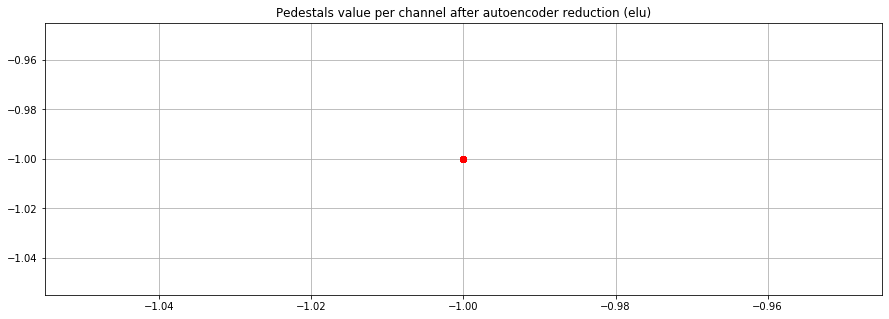

In [39]:
fig, ax = plt.subplots()
ax.set_title('Pedestals value per channel after autoencoder reduction (elu)')

for file in data_files:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("pedestal")]
    data2 = data.loc[:, 2:2049]

    data2.index = module_names()
    data2.columns = range(2048)

    data_test = data2
    
    Zenc = module_encoder.predict(data_test) 

    ax.plot(Zenc[:,0], Zenc[:,1], 'ro')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

In [40]:
ncol = 2048
model10 = Sequential()

# Encoder Layers
model10.add(Dense(2000, activation = 'softmax', input_shape=(ncol,)))
model10.add(Dense(1750, activation = 'softmax'))
model10.add(Dense(1500, activation = 'softmax'))
model10.add(Dense(1250, activation = 'softmax'))
model10.add(Dense(1000, activation = 'softmax'))
model10.add(Dense(750 , activation = 'softmax'))
model10.add(Dense(500 , activation = 'softmax'))
model10.add(Dense(250 , activation = 'softmax'))
model10.add(Dense(100 , activation = 'softmax'))
model10.add(Dense(50  , activation = 'softmax'))
model10.add(Dense(20  , activation = 'softmax'))
model10.add(Dense(2   , activation = 'softmax', name="bottleneck"))

# Decoder Layers
model10.add(Dense(20  , activation = 'softmax'))
model10.add(Dense(50  , activation = 'softmax'))
model10.add(Dense(100 , activation = 'softmax'))
model10.add(Dense(250 , activation = 'softmax'))
model10.add(Dense(500 , activation = 'softmax'))
model10.add(Dense(750 , activation = 'softmax'))
model10.add(Dense(1000, activation = 'softmax'))
model10.add(Dense(1250, activation = 'softmax'))
model10.add(Dense(1500, activation = 'softmax'))
model10.add(Dense(1750, activation = 'softmax'))
model10.add(Dense(2000, activation = 'softmax'))
model10.add(Dense(2048, activation = 'sigmoid'))

# Compile the Model
model10.compile(loss = 'mean_squared_error', optimizer = Adam())

model10.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_128 (Dense)            (None, 2000)              4098000   
_________________________________________________________________
dense_129 (Dense)            (None, 1750)              3501750   
_________________________________________________________________
dense_130 (Dense)            (None, 1500)              2626500   
_________________________________________________________________
dense_131 (Dense)            (None, 1250)              1876250   
_________________________________________________________________
dense_132 (Dense)            (None, 1000)              1251000   
_________________________________________________________________
dense_133 (Dense)            (None, 750)               750750    
_________________________________________________________________
dense_134 (Dense)            (None, 500)               375500    
__________

In [41]:
for file in data_files:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("pedestal")]
    data2 = data.loc[:, 2:2049]

    data2.index = module_names()
    data2.columns = range(2048)

    data_train = data2
    
    model10.fit(data_train, data_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
84/84 [==============================] - 9s 110ms/step - loss: 270034.3438
Epoch 2/10
84/84 [==============================] - 1s 18ms/step - loss: 270033.0312
Epoch 3/10
84/84 [==============================] - 1s 16ms/step - loss: 270032.7188
Epoch 4/10
84/84 [==============================] - 1s 14ms/step - loss: 270032.6875
Epoch 5/10
84/84 [==============================] - 1s 16ms/step - loss: 270032.6562
Epoch 6/10
84/84 [==============================] - 1s 15ms/step - loss: 270031.6875
Epoch 7/10
84/84 [==============================] - 1s 15ms/step - loss: 270030.9688
Epoch 8/10
84/84 [==============================] - 1s 16ms/step - loss: 270030.9062
Epoch 9/10
84/84 [==============================] - 2s 24ms/step - loss: 270030.8438
Epoch 10/10
84/84 [==============================] - 1s 17ms/step - loss: 270029.8125
Epoch 1/10
84/84 [==============================] - 1s 17ms/step - loss: 270226.1562
Epoch 2/10
84/84 [==============================] - 1s 16ms/ste

Epoch 8/10
84/84 [==============================] - 2s 24ms/step - loss: 271380.6875
Epoch 9/10
84/84 [==============================] - 1s 16ms/step - loss: 271380.2500
Epoch 10/10
84/84 [==============================] - 1s 14ms/step - loss: 271379.3750
Epoch 1/10
84/84 [==============================] - 1s 15ms/step - loss: 271781.0625
Epoch 2/10
84/84 [==============================] - 1s 16ms/step - loss: 271779.9375
Epoch 3/10
84/84 [==============================] - 1s 16ms/step - loss: 271779.6562
Epoch 4/10
84/84 [==============================] - 1s 15ms/step - loss: 271779.2812
Epoch 5/10
84/84 [==============================] - 1s 15ms/step - loss: 271779.1250
Epoch 6/10
84/84 [==============================] - 1s 15ms/step - loss: 271778.7188
Epoch 7/10
84/84 [==============================] - 2s 22ms/step - loss: 271778.1875
Epoch 8/10
84/84 [==============================] - 1s 17ms/step - loss: 271777.5312
Epoch 9/10
84/84 [==============================] - 1s 15ms/step

Epoch 5/10
84/84 [==============================] - 1s 16ms/step - loss: 271264.3438
Epoch 6/10
84/84 [==============================] - 1s 16ms/step - loss: 271264.0000
Epoch 7/10
84/84 [==============================] - 2s 20ms/step - loss: 271263.5938
Epoch 8/10
84/84 [==============================] - 2s 19ms/step - loss: 271262.0625
Epoch 9/10
84/84 [==============================] - 1s 16ms/step - loss: 271261.6562
Epoch 10/10
84/84 [==============================] - 1s 16ms/step - loss: 271261.3438
Epoch 1/10
84/84 [==============================] - 1s 14ms/step - loss: 271468.9375
Epoch 2/10
84/84 [==============================] - 1s 15ms/step - loss: 271468.6250
Epoch 3/10
84/84 [==============================] - 1s 17ms/step - loss: 271468.3125
Epoch 4/10
84/84 [==============================] - 1s 15ms/step - loss: 271467.6562
Epoch 5/10
84/84 [==============================] - 1s 16ms/step - loss: 271466.9688
Epoch 6/10
84/84 [==============================] - 1s 18ms/step

Epoch 2/10
84/84 [==============================] - 1s 16ms/step - loss: 271139.5000
Epoch 3/10
84/84 [==============================] - 1s 16ms/step - loss: 271139.0625
Epoch 4/10
84/84 [==============================] - 1s 16ms/step - loss: 271138.5312
Epoch 5/10
84/84 [==============================] - 1s 15ms/step - loss: 271138.1562
Epoch 6/10
84/84 [==============================] - 1s 16ms/step - loss: 271137.9375
Epoch 7/10
84/84 [==============================] - 1s 16ms/step - loss: 271137.5938
Epoch 8/10
84/84 [==============================] - 1s 16ms/step - loss: 271137.0938
Epoch 9/10
84/84 [==============================] - 1s 16ms/step - loss: 271135.7188
Epoch 10/10
84/84 [==============================] - 1s 16ms/step - loss: 271135.3750
Epoch 1/10
84/84 [==============================] - 1s 15ms/step - loss: 270962.7188
Epoch 2/10
84/84 [==============================] - 1s 16ms/step - loss: 270962.3750
Epoch 3/10
84/84 [==============================] - 1s 16ms/step

Epoch 9/10
84/84 [==============================] - 1s 16ms/step - loss: 271364.9375
Epoch 10/10
84/84 [==============================] - 1s 16ms/step - loss: 271364.7500
Epoch 1/10
84/84 [==============================] - 1s 15ms/step - loss: 271422.6250
Epoch 2/10
84/84 [==============================] - 1s 15ms/step - loss: 271422.4062
Epoch 3/10
84/84 [==============================] - 1s 15ms/step - loss: 271421.9688
Epoch 4/10
84/84 [==============================] - 1s 16ms/step - loss: 271421.0000
Epoch 5/10
84/84 [==============================] - 1s 16ms/step - loss: 271420.7188
Epoch 6/10
84/84 [==============================] - 1s 15ms/step - loss: 271420.4375
Epoch 7/10
84/84 [==============================] - 1s 15ms/step - loss: 271420.1562
Epoch 8/10
84/84 [==============================] - 1s 15ms/step - loss: 271419.8125
Epoch 9/10
84/84 [==============================] - 1s 15ms/step - loss: 271419.3438
Epoch 10/10
84/84 [==============================] - 1s 16ms/ste

In [42]:
module_encoder = Model(model10.input, model10.get_layer('bottleneck').output)
module_encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_128_input (InputLayer) (None, 2048)              0         
_________________________________________________________________
dense_128 (Dense)            (None, 2000)              4098000   
_________________________________________________________________
dense_129 (Dense)            (None, 1750)              3501750   
_________________________________________________________________
dense_130 (Dense)            (None, 1500)              2626500   
_________________________________________________________________
dense_131 (Dense)            (None, 1250)              1876250   
_________________________________________________________________
dense_132 (Dense)            (None, 1000)              1251000   
_________________________________________________________________
dense_133 (Dense)            (None, 750)               750750    
__________

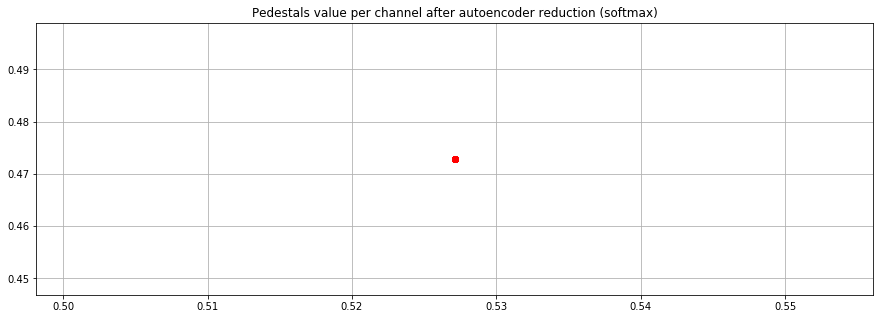

In [43]:
fig, ax = plt.subplots()
ax.set_title('Pedestals value per channel after autoencoder reduction (softmax)')

for file in data_files:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("pedestal")]
    data2 = data.loc[:, 2:2049]

    data2.index = module_names()
    data2.columns = range(2048)

    data_test = data2
    
    Zenc = module_encoder.predict(data_test) 

    ax.plot(Zenc[:,0], Zenc[:,1], 'ro')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

In [44]:
ncol = 2048
model11 = Sequential()

# Encoder Layers
model11.add(Dense(2000, activation = 'selu', input_shape=(ncol,)))
model11.add(Dense(1750, activation = 'selu'))
model11.add(Dense(1500, activation = 'selu'))
model11.add(Dense(1250, activation = 'selu'))
model11.add(Dense(1000, activation = 'selu'))
model11.add(Dense(750 , activation = 'selu'))
model11.add(Dense(500 , activation = 'selu'))
model11.add(Dense(250 , activation = 'selu'))
model11.add(Dense(100 , activation = 'selu'))
model11.add(Dense(50  , activation = 'selu'))
model11.add(Dense(20  , activation = 'selu'))
model11.add(Dense(2   , activation = 'selu', name="bottleneck"))

# Decoder Layers
model11.add(Dense(20  , activation = 'selu'))
model11.add(Dense(50  , activation = 'selu'))
model11.add(Dense(100 , activation = 'selu'))
model11.add(Dense(250 , activation = 'selu'))
model11.add(Dense(500 , activation = 'selu'))
model11.add(Dense(750 , activation = 'selu'))
model11.add(Dense(1000, activation = 'selu'))
model11.add(Dense(1250, activation = 'selu'))
model11.add(Dense(1500, activation = 'selu'))
model11.add(Dense(1750, activation = 'selu'))
model11.add(Dense(2000, activation = 'selu'))
model11.add(Dense(2048, activation = 'sigmoid'))

# Compile the Model
model11.compile(loss = 'mean_squared_error', optimizer = Adam())

model11.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_151 (Dense)            (None, 2000)              4098000   
_________________________________________________________________
dense_152 (Dense)            (None, 1750)              3501750   
_________________________________________________________________
dense_153 (Dense)            (None, 1500)              2626500   
_________________________________________________________________
dense_154 (Dense)            (None, 1250)              1876250   
_________________________________________________________________
dense_155 (Dense)            (None, 1000)              1251000   
_________________________________________________________________
dense_156 (Dense)            (None, 750)               750750    
_________________________________________________________________
dense_157 (Dense)            (None, 500)               375500    
__________

In [45]:
for file in data_files:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("pedestal")]
    data2 = data.loc[:, 2:2049]

    data2.index = module_names()
    data2.columns = range(2048)

    data_train = data2
    
    model11.fit(data_train, data_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
84/84 [==============================] - 9s 111ms/step - loss: 270038.1562
Epoch 2/10
84/84 [==============================] - 1s 15ms/step - loss: 269794.4062
Epoch 3/10
84/84 [==============================] - 2s 19ms/step - loss: 269628.7500
Epoch 4/10
84/84 [==============================] - 1s 14ms/step - loss: 269561.3750
Epoch 5/10
84/84 [==============================] - 1s 15ms/step - loss: 269541.6875
Epoch 6/10
84/84 [==============================] - 1s 16ms/step - loss: 269528.5312
Epoch 7/10
84/84 [==============================] - 1s 16ms/step - loss: 269525.4688
Epoch 8/10
84/84 [==============================] - 1s 16ms/step - loss: 269523.4375
Epoch 9/10
84/84 [==============================] - 1s 16ms/step - loss: 269521.9375
Epoch 10/10
84/84 [==============================] - 1s 14ms/step - loss: 269521.4375
Epoch 1/10
84/84 [==============================] - 1s 13ms/step - loss: 269717.5625
Epoch 2/10
84/84 [==============================] - 1s 16ms/ste

Epoch 8/10
84/84 [==============================] - 1s 14ms/step - loss: 270910.4375
Epoch 9/10
84/84 [==============================] - 1s 15ms/step - loss: 270910.5000
Epoch 10/10
84/84 [==============================] - 1s 16ms/step - loss: 270910.5000
Epoch 1/10
84/84 [==============================] - 1s 15ms/step - loss: 271312.2812
Epoch 2/10
84/84 [==============================] - 1s 16ms/step - loss: 271312.2500
Epoch 3/10
84/84 [==============================] - 1s 15ms/step - loss: 271312.3125
Epoch 4/10
84/84 [==============================] - 1s 14ms/step - loss: 271312.2500
Epoch 5/10
84/84 [==============================] - 1s 16ms/step - loss: 271312.2500
Epoch 6/10
84/84 [==============================] - 1s 15ms/step - loss: 271312.2500
Epoch 7/10
84/84 [==============================] - 1s 15ms/step - loss: 271312.2812
Epoch 8/10
84/84 [==============================] - 1s 16ms/step - loss: 271312.2812
Epoch 9/10
84/84 [==============================] - 1s 16ms/step

Epoch 5/10
84/84 [==============================] - 2s 24ms/step - loss: 270844.0625
Epoch 6/10
84/84 [==============================] - 1s 17ms/step - loss: 270844.0625
Epoch 7/10
84/84 [==============================] - 1s 16ms/step - loss: 270844.0625
Epoch 8/10
84/84 [==============================] - 1s 16ms/step - loss: 270844.0625
Epoch 9/10
84/84 [==============================] - 1s 16ms/step - loss: 270844.0625
Epoch 10/10
84/84 [==============================] - 1s 16ms/step - loss: 270844.0625
Epoch 1/10
84/84 [==============================] - 1s 14ms/step - loss: 271052.0625
Epoch 2/10
84/84 [==============================] - 1s 16ms/step - loss: 271052.0625
Epoch 3/10
84/84 [==============================] - 1s 16ms/step - loss: 271052.0625
Epoch 4/10
84/84 [==============================] - 2s 23ms/step - loss: 271052.0625
Epoch 5/10
84/84 [==============================] - 2s 20ms/step - loss: 271052.0625
Epoch 6/10
84/84 [==============================] - 1s 16ms/step

Epoch 2/10
84/84 [==============================] - 1s 16ms/step - loss: 270768.5312
Epoch 3/10
84/84 [==============================] - 1s 16ms/step - loss: 270768.5312
Epoch 4/10
84/84 [==============================] - 2s 22ms/step - loss: 270768.5312
Epoch 5/10
84/84 [==============================] - 2s 20ms/step - loss: 270768.5312
Epoch 6/10
84/84 [==============================] - 1s 16ms/step - loss: 270768.5312
Epoch 7/10
84/84 [==============================] - 1s 16ms/step - loss: 270768.5312
Epoch 8/10
84/84 [==============================] - 1s 14ms/step - loss: 270768.5312
Epoch 9/10
84/84 [==============================] - 1s 16ms/step - loss: 270768.5000
Epoch 10/10
84/84 [==============================] - 1s 15ms/step - loss: 270768.5000
Epoch 1/10
84/84 [==============================] - 1s 15ms/step - loss: 270596.2500
Epoch 2/10
84/84 [==============================] - 1s 15ms/step - loss: 270596.2812
Epoch 3/10
84/84 [==============================] - 2s 21ms/step

Epoch 9/10
84/84 [==============================] - 1s 16ms/step - loss: 271041.0000
Epoch 10/10
84/84 [==============================] - 1s 16ms/step - loss: 271041.0000
Epoch 1/10
84/84 [==============================] - 1s 15ms/step - loss: 271099.6250
Epoch 2/10
84/84 [==============================] - 1s 16ms/step - loss: 271099.6562
Epoch 3/10
84/84 [==============================] - 1s 16ms/step - loss: 271099.6250
Epoch 4/10
84/84 [==============================] - 1s 16ms/step - loss: 271099.6250
Epoch 5/10
84/84 [==============================] - 1s 16ms/step - loss: 271099.6250
Epoch 6/10
84/84 [==============================] - 1s 14ms/step - loss: 271099.6250
Epoch 7/10
84/84 [==============================] - 1s 15ms/step - loss: 271099.6250
Epoch 8/10
84/84 [==============================] - 1s 16ms/step - loss: 271099.6250
Epoch 9/10
84/84 [==============================] - 1s 16ms/step - loss: 271099.5938
Epoch 10/10
84/84 [==============================] - 1s 16ms/ste

In [46]:
module_encoder = Model(model11.input, model11.get_layer('bottleneck').output)
module_encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_151_input (InputLayer) (None, 2048)              0         
_________________________________________________________________
dense_151 (Dense)            (None, 2000)              4098000   
_________________________________________________________________
dense_152 (Dense)            (None, 1750)              3501750   
_________________________________________________________________
dense_153 (Dense)            (None, 1500)              2626500   
_________________________________________________________________
dense_154 (Dense)            (None, 1250)              1876250   
_________________________________________________________________
dense_155 (Dense)            (None, 1000)              1251000   
_________________________________________________________________
dense_156 (Dense)            (None, 750)               750750    
__________

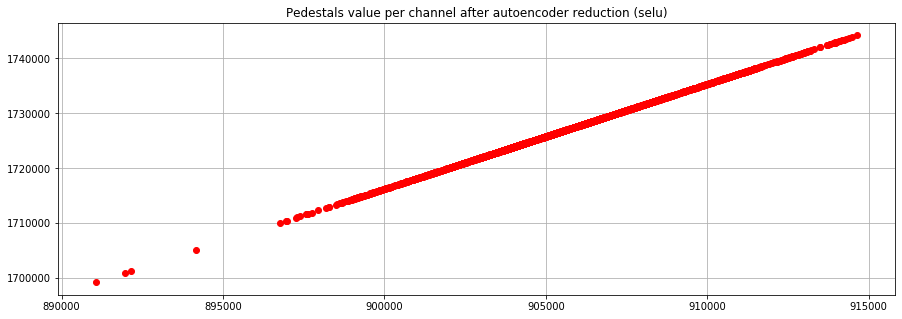

In [47]:
fig, ax = plt.subplots()
ax.set_title('Pedestals value per channel after autoencoder reduction (selu)')

for file in data_files:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("pedestal")]
    data2 = data.loc[:, 2:2049]

    data2.index = module_names()
    data2.columns = range(2048)

    data_test = data2
    
    Zenc = module_encoder.predict(data_test) 

    ax.plot(Zenc[:,0], Zenc[:,1], 'ro')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

In [48]:
ncol = 2048
model12 = Sequential()

# Encoder Layers
model12.add(Dense(2000, activation = 'relu', input_shape=(ncol,)))
model12.add(Dense(1750, activation = 'relu'))
model12.add(Dense(1500, activation = 'relu'))
model12.add(Dense(1250, activation = 'relu'))
model12.add(Dense(1000, activation = 'relu'))
model12.add(Dense(750 , activation = 'relu'))
model12.add(Dense(500 , activation = 'relu'))
model12.add(Dense(250 , activation = 'relu'))
model12.add(Dense(100 , activation = 'relu'))
model12.add(Dense(50  , activation = 'relu'))
model12.add(Dense(20  , activation = 'relu'))
model12.add(Dense(2   , activation = 'relu', name="bottleneck"))

# Decoder Layers
model12.add(Dense(20  , activation = 'relu'))
model12.add(Dense(50  , activation = 'relu'))
model12.add(Dense(100 , activation = 'relu'))
model12.add(Dense(250 , activation = 'relu'))
model12.add(Dense(500 , activation = 'relu'))
model12.add(Dense(750 , activation = 'relu'))
model12.add(Dense(1000, activation = 'relu'))
model12.add(Dense(1250, activation = 'relu'))
model12.add(Dense(1500, activation = 'relu'))
model12.add(Dense(1750, activation = 'relu'))
model12.add(Dense(2000, activation = 'relu'))
model12.add(Dense(2048, activation = 'sigmoid'))

# Compile the Model
model12.compile(loss = 'mean_squared_error', optimizer = Adam())

model12.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_174 (Dense)            (None, 2000)              4098000   
_________________________________________________________________
dense_175 (Dense)            (None, 1750)              3501750   
_________________________________________________________________
dense_176 (Dense)            (None, 1500)              2626500   
_________________________________________________________________
dense_177 (Dense)            (None, 1250)              1876250   
_________________________________________________________________
dense_178 (Dense)            (None, 1000)              1251000   
_________________________________________________________________
dense_179 (Dense)            (None, 750)               750750    
_________________________________________________________________
dense_180 (Dense)            (None, 500)               375500    
__________

In [49]:
for file in data_files:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("pedestal")]
    data2 = data.loc[:, 2:2049]

    data2.index = module_names()
    data2.columns = range(2048)

    data_train = data2
    
    model12.fit(data_train, data_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
84/84 [==============================] - 11s 136ms/step - loss: 270034.3438
Epoch 2/10
84/84 [==============================] - 2s 20ms/step - loss: 270034.3438
Epoch 3/10
84/84 [==============================] - 2s 18ms/step - loss: 270032.7500
Epoch 4/10
84/84 [==============================] - 1s 17ms/step - loss: 270032.7500
Epoch 5/10
84/84 [==============================] - 2s 28ms/step - loss: 270032.7500
Epoch 6/10
84/84 [==============================] - 1s 14ms/step - loss: 270032.7500
Epoch 7/10
84/84 [==============================] - 1s 16ms/step - loss: 270032.6562
Epoch 8/10
84/84 [==============================] - 1s 16ms/step - loss: 270032.6562
Epoch 9/10
84/84 [==============================] - 1s 16ms/step - loss: 270032.6562
Epoch 10/10
84/84 [==============================] - 1s 16ms/step - loss: 270032.6562
Epoch 1/10
84/84 [==============================] - 1s 15ms/step - loss: 270228.2500
Epoch 2/10
84/84 [==============================] - 1s 16ms/st

Epoch 8/10
84/84 [==============================] - 1s 16ms/step - loss: 271405.2500
Epoch 9/10
84/84 [==============================] - 1s 15ms/step - loss: 271405.1562
Epoch 10/10
84/84 [==============================] - 1s 15ms/step - loss: 271405.1250
Epoch 1/10
84/84 [==============================] - 1s 15ms/step - loss: 271806.9375
Epoch 2/10
84/84 [==============================] - 1s 16ms/step - loss: 271806.8438
Epoch 3/10
84/84 [==============================] - 1s 16ms/step - loss: 271805.9375
Epoch 4/10
84/84 [==============================] - 1s 16ms/step - loss: 271805.7188
Epoch 5/10
84/84 [==============================] - 2s 20ms/step - loss: 271805.6562
Epoch 6/10
84/84 [==============================] - 2s 19ms/step - loss: 271805.5625
Epoch 7/10
84/84 [==============================] - 1s 16ms/step - loss: 271805.5000
Epoch 8/10
84/84 [==============================] - 1s 15ms/step - loss: 271805.3125
Epoch 9/10
84/84 [==============================] - 1s 16ms/step

Epoch 5/10
84/84 [==============================] - 1s 17ms/step - loss: 271314.1250
Epoch 6/10
84/84 [==============================] - 1s 15ms/step - loss: 271313.8125
Epoch 7/10
84/84 [==============================] - 1s 15ms/step - loss: 271313.7500
Epoch 8/10
84/84 [==============================] - 1s 16ms/step - loss: 271313.1562
Epoch 9/10
84/84 [==============================] - 1s 16ms/step - loss: 271312.6250
Epoch 10/10
84/84 [==============================] - 1s 16ms/step - loss: 271312.5312
Epoch 1/10
84/84 [==============================] - 1s 15ms/step - loss: 271520.4375
Epoch 2/10
84/84 [==============================] - 1s 15ms/step - loss: 271519.5312
Epoch 3/10
84/84 [==============================] - 1s 16ms/step - loss: 271519.3438
Epoch 4/10
84/84 [==============================] - 1s 16ms/step - loss: 271519.2500
Epoch 5/10
84/84 [==============================] - 1s 16ms/step - loss: 271519.0312
Epoch 6/10
84/84 [==============================] - 1s 16ms/step

Epoch 2/10
84/84 [==============================] - 1s 15ms/step - loss: 271213.2500
Epoch 3/10
84/84 [==============================] - 1s 16ms/step - loss: 271213.0938
Epoch 4/10
84/84 [==============================] - 1s 16ms/step - loss: 271212.9375
Epoch 5/10
84/84 [==============================] - 1s 16ms/step - loss: 271212.0312
Epoch 6/10
84/84 [==============================] - 1s 15ms/step - loss: 271211.7188
Epoch 7/10
84/84 [==============================] - 1s 16ms/step - loss: 271211.6562
Epoch 8/10
84/84 [==============================] - 1s 15ms/step - loss: 271211.5312
Epoch 9/10
84/84 [==============================] - 1s 16ms/step - loss: 271211.4375
Epoch 10/10
84/84 [==============================] - 1s 15ms/step - loss: 271211.1250
Epoch 1/10
84/84 [==============================] - 1s 15ms/step - loss: 271038.7500
Epoch 2/10
84/84 [==============================] - 1s 16ms/step - loss: 271038.5312
Epoch 3/10
84/84 [==============================] - 1s 15ms/step

Epoch 9/10
84/84 [==============================] - 2s 19ms/step - loss: 271461.9375
Epoch 10/10
84/84 [==============================] - 2s 21ms/step - loss: 271461.8750
Epoch 1/10
84/84 [==============================] - 2s 21ms/step - loss: 271520.2500
Epoch 2/10
84/84 [==============================] - 1s 16ms/step - loss: 271520.0625
Epoch 3/10
84/84 [==============================] - 1s 16ms/step - loss: 271520.0625
Epoch 4/10
84/84 [==============================] - 1s 16ms/step - loss: 271519.7188
Epoch 5/10
84/84 [==============================] - 1s 16ms/step - loss: 271519.4688
Epoch 6/10
84/84 [==============================] - 1s 15ms/step - loss: 271519.4375
Epoch 7/10
84/84 [==============================] - 1s 17ms/step - loss: 271518.6875
Epoch 8/10
84/84 [==============================] - 1s 17ms/step - loss: 271517.6875
Epoch 9/10
84/84 [==============================] - 2s 26ms/step - loss: 271517.5625
Epoch 10/10
84/84 [==============================] - 1s 17ms/ste

In [50]:
module_encoder = Model(model12.input, model12.get_layer('bottleneck').output)
module_encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_174_input (InputLayer) (None, 2048)              0         
_________________________________________________________________
dense_174 (Dense)            (None, 2000)              4098000   
_________________________________________________________________
dense_175 (Dense)            (None, 1750)              3501750   
_________________________________________________________________
dense_176 (Dense)            (None, 1500)              2626500   
_________________________________________________________________
dense_177 (Dense)            (None, 1250)              1876250   
_________________________________________________________________
dense_178 (Dense)            (None, 1000)              1251000   
_________________________________________________________________
dense_179 (Dense)            (None, 750)               750750    
__________

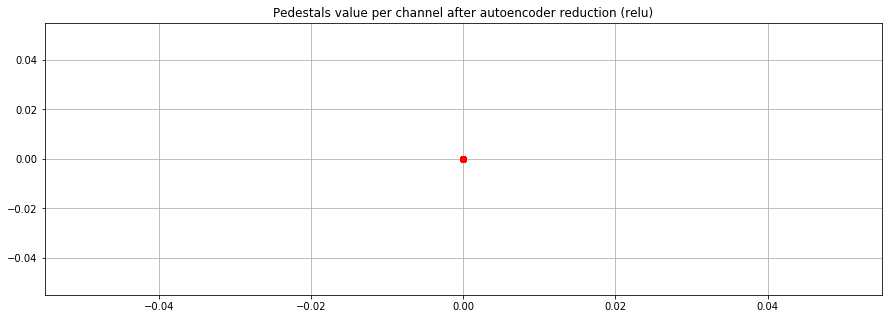

In [51]:
fig, ax = plt.subplots()
ax.set_title('Pedestals value per channel after autoencoder reduction (relu)')

for file in data_files:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("pedestal")]
    data2 = data.loc[:, 2:2049]

    data2.index = module_names()
    data2.columns = range(2048)

    data_test = data2
    
    Zenc = module_encoder.predict(data_test) 

    ax.plot(Zenc[:,0], Zenc[:,1], 'ro')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

In [52]:
ncol = 2048
model13 = Sequential()

# Encoder Layers
model13.add(Dense(2000, activation = 'tanh', input_shape=(ncol,)))
model13.add(Dense(1750, activation = 'tanh'))
model13.add(Dense(1500, activation = 'tanh'))
model13.add(Dense(1250, activation = 'tanh'))
model13.add(Dense(1000, activation = 'tanh'))
model13.add(Dense(750 , activation = 'tanh'))
model13.add(Dense(500 , activation = 'tanh'))
model13.add(Dense(250 , activation = 'tanh'))
model13.add(Dense(100 , activation = 'tanh'))
model13.add(Dense(50  , activation = 'tanh'))
model13.add(Dense(20  , activation = 'tanh'))
model13.add(Dense(2   , activation = 'tanh', name="bottleneck"))

# Decoder Layers
model13.add(Dense(20  , activation = 'tanh'))
model13.add(Dense(50  , activation = 'tanh'))
model13.add(Dense(100 , activation = 'tanh'))
model13.add(Dense(250 , activation = 'tanh'))
model13.add(Dense(500 , activation = 'tanh'))
model13.add(Dense(750 , activation = 'tanh'))
model13.add(Dense(1000, activation = 'tanh'))
model13.add(Dense(1250, activation = 'tanh'))
model13.add(Dense(1500, activation = 'tanh'))
model13.add(Dense(1750, activation = 'tanh'))
model13.add(Dense(2000, activation = 'tanh'))
model13.add(Dense(2048, activation = 'sigmoid'))

# Compile the Model
model13.compile(loss = 'mean_squared_error', optimizer = Adam())

model13.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_197 (Dense)            (None, 2000)              4098000   
_________________________________________________________________
dense_198 (Dense)            (None, 1750)              3501750   
_________________________________________________________________
dense_199 (Dense)            (None, 1500)              2626500   
_________________________________________________________________
dense_200 (Dense)            (None, 1250)              1876250   
_________________________________________________________________
dense_201 (Dense)            (None, 1000)              1251000   
_________________________________________________________________
dense_202 (Dense)            (None, 750)               750750    
_________________________________________________________________
dense_203 (Dense)            (None, 500)               375500    
__________

In [53]:
for file in data_files:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("pedestal")]
    data2 = data.loc[:, 2:2049]

    data2.index = module_names()
    data2.columns = range(2048)

    data_train = data2
    
    model13.fit(data_train, data_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
84/84 [==============================] - 11s 131ms/step - loss: 270033.8438
Epoch 2/10
84/84 [==============================] - 2s 23ms/step - loss: 269959.8750
Epoch 3/10
84/84 [==============================] - 2s 20ms/step - loss: 269680.2500
Epoch 4/10
84/84 [==============================] - 1s 16ms/step - loss: 269565.2812
Epoch 5/10
84/84 [==============================] - 1s 16ms/step - loss: 269527.4688
Epoch 6/10
84/84 [==============================] - 1s 16ms/step - loss: 269517.8438
Epoch 7/10
84/84 [==============================] - 1s 16ms/step - loss: 269516.4375
Epoch 8/10
84/84 [==============================] - 1s 16ms/step - loss: 269516.3125
Epoch 9/10
84/84 [==============================] - 1s 16ms/step - loss: 269516.2812
Epoch 10/10
84/84 [==============================] - 1s 16ms/step - loss: 269516.2188
Epoch 1/10
84/84 [==============================] - 1s 14ms/step - loss: 269712.7812
Epoch 2/10
84/84 [==============================] - 1s 15ms/st

Epoch 8/10
84/84 [==============================] - 1s 16ms/step - loss: 270909.9375
Epoch 9/10
84/84 [==============================] - 1s 15ms/step - loss: 270909.9688
Epoch 10/10
84/84 [==============================] - 1s 15ms/step - loss: 270909.9688
Epoch 1/10
84/84 [==============================] - 1s 16ms/step - loss: 271311.7500
Epoch 2/10
84/84 [==============================] - 1s 15ms/step - loss: 271311.7500
Epoch 3/10
84/84 [==============================] - 1s 16ms/step - loss: 271311.7500
Epoch 4/10
84/84 [==============================] - 2s 23ms/step - loss: 271311.7500
Epoch 5/10
84/84 [==============================] - 1s 18ms/step - loss: 271311.7500
Epoch 6/10
84/84 [==============================] - 1s 15ms/step - loss: 271311.7500
Epoch 7/10
84/84 [==============================] - 1s 17ms/step - loss: 271311.7500
Epoch 8/10
84/84 [==============================] - 1s 17ms/step - loss: 271311.7812
Epoch 9/10
84/84 [==============================] - 1s 16ms/step

Epoch 5/10
84/84 [==============================] - 1s 15ms/step - loss: 270843.5625
Epoch 6/10
84/84 [==============================] - 1s 16ms/step - loss: 270843.5312
Epoch 7/10
84/84 [==============================] - 2s 21ms/step - loss: 270843.5312
Epoch 8/10
84/84 [==============================] - 1s 17ms/step - loss: 270843.5625
Epoch 9/10
84/84 [==============================] - 1s 16ms/step - loss: 270843.5312
Epoch 10/10
84/84 [==============================] - 1s 16ms/step - loss: 270843.5625
Epoch 1/10
84/84 [==============================] - 1s 15ms/step - loss: 271051.5625
Epoch 2/10
84/84 [==============================] - 1s 15ms/step - loss: 271051.5312
Epoch 3/10
84/84 [==============================] - 1s 15ms/step - loss: 271051.5312
Epoch 4/10
84/84 [==============================] - 1s 15ms/step - loss: 271051.5312
Epoch 5/10
84/84 [==============================] - 1s 15ms/step - loss: 271051.5312
Epoch 6/10
84/84 [==============================] - 2s 22ms/step

Epoch 2/10
84/84 [==============================] - 1s 17ms/step - loss: 270768.0000
Epoch 3/10
84/84 [==============================] - 2s 20ms/step - loss: 270768.0000
Epoch 4/10
84/84 [==============================] - 1s 17ms/step - loss: 270768.0000
Epoch 5/10
84/84 [==============================] - 2s 19ms/step - loss: 270768.0312
Epoch 6/10
84/84 [==============================] - 1s 17ms/step - loss: 270768.0312
Epoch 7/10
84/84 [==============================] - 2s 18ms/step - loss: 270768.0000
Epoch 8/10
84/84 [==============================] - 2s 18ms/step - loss: 270768.0000
Epoch 9/10
84/84 [==============================] - 1s 17ms/step - loss: 270768.0000
Epoch 10/10
84/84 [==============================] - 1s 16ms/step - loss: 270768.0000
Epoch 1/10
84/84 [==============================] - 1s 15ms/step - loss: 270595.7500
Epoch 2/10
84/84 [==============================] - 2s 18ms/step - loss: 270595.7500
Epoch 3/10
84/84 [==============================] - 1s 16ms/step

Epoch 9/10
84/84 [==============================] - 2s 19ms/step - loss: 271040.4688
Epoch 10/10
84/84 [==============================] - 2s 19ms/step - loss: 271040.4375
Epoch 1/10
84/84 [==============================] - 1s 16ms/step - loss: 271099.0938
Epoch 2/10
84/84 [==============================] - 1s 17ms/step - loss: 271099.0938
Epoch 3/10
84/84 [==============================] - 1s 17ms/step - loss: 271099.1562
Epoch 4/10
84/84 [==============================] - 2s 18ms/step - loss: 271099.1250
Epoch 5/10
84/84 [==============================] - 2s 19ms/step - loss: 271099.0938
Epoch 6/10
84/84 [==============================] - 1s 17ms/step - loss: 271099.0938
Epoch 7/10
84/84 [==============================] - 1s 18ms/step - loss: 271099.0938
Epoch 8/10
84/84 [==============================] - 1s 17ms/step - loss: 271099.1250
Epoch 9/10
84/84 [==============================] - 1s 17ms/step - loss: 271099.0938
Epoch 10/10
84/84 [==============================] - 1s 17ms/ste

In [54]:
module_encoder = Model(model13.input, model13.get_layer('bottleneck').output)
module_encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_197_input (InputLayer) (None, 2048)              0         
_________________________________________________________________
dense_197 (Dense)            (None, 2000)              4098000   
_________________________________________________________________
dense_198 (Dense)            (None, 1750)              3501750   
_________________________________________________________________
dense_199 (Dense)            (None, 1500)              2626500   
_________________________________________________________________
dense_200 (Dense)            (None, 1250)              1876250   
_________________________________________________________________
dense_201 (Dense)            (None, 1000)              1251000   
_________________________________________________________________
dense_202 (Dense)            (None, 750)               750750    
__________

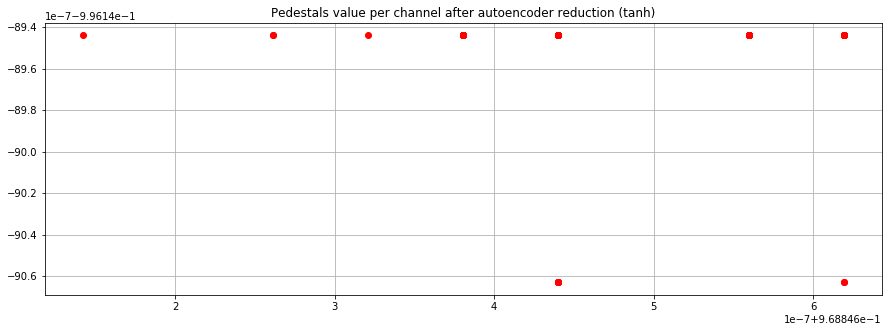

In [55]:
fig, ax = plt.subplots()
ax.set_title('Pedestals value per channel after autoencoder reduction (tanh)')

for file in data_files:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("pedestal")]
    data2 = data.loc[:, 2:2049]

    data2.index = module_names()
    data2.columns = range(2048)

    data_test = data2
    
    Zenc = module_encoder.predict(data_test) 

    ax.plot(Zenc[:,0], Zenc[:,1], 'ro')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

In [56]:
ncol = 2048
model14 = Sequential()

# Encoder Layers
model14.add(Dense(2000, activation = 'sigmoid', input_shape=(ncol,)))
model14.add(Dense(1750, activation = 'sigmoid'))
model14.add(Dense(1500, activation = 'sigmoid'))
model14.add(Dense(1250, activation = 'sigmoid'))
model14.add(Dense(1000, activation = 'sigmoid'))
model14.add(Dense(750 , activation = 'sigmoid'))
model14.add(Dense(500 , activation = 'sigmoid'))
model14.add(Dense(250 , activation = 'sigmoid'))
model14.add(Dense(100 , activation = 'sigmoid'))
model14.add(Dense(50  , activation = 'sigmoid'))
model14.add(Dense(20  , activation = 'sigmoid'))
model14.add(Dense(2   , activation = 'sigmoid', name="bottleneck"))

# Decoder Layers
model14.add(Dense(20  , activation = 'sigmoid'))
model14.add(Dense(50  , activation = 'sigmoid'))
model14.add(Dense(100 , activation = 'sigmoid'))
model14.add(Dense(250 , activation = 'sigmoid'))
model14.add(Dense(500 , activation = 'sigmoid'))
model14.add(Dense(750 , activation = 'sigmoid'))
model14.add(Dense(1000, activation = 'sigmoid'))
model14.add(Dense(1250, activation = 'sigmoid'))
model14.add(Dense(1500, activation = 'sigmoid'))
model14.add(Dense(1750, activation = 'sigmoid'))
model14.add(Dense(2000, activation = 'sigmoid'))
model14.add(Dense(2048, activation = 'sigmoid'))

# Compile the Model
model14.compile(loss = 'mean_squared_error', optimizer = Adam())

model14.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_220 (Dense)            (None, 2000)              4098000   
_________________________________________________________________
dense_221 (Dense)            (None, 1750)              3501750   
_________________________________________________________________
dense_222 (Dense)            (None, 1500)              2626500   
_________________________________________________________________
dense_223 (Dense)            (None, 1250)              1876250   
_________________________________________________________________
dense_224 (Dense)            (None, 1000)              1251000   
_________________________________________________________________
dense_225 (Dense)            (None, 750)               750750    
_________________________________________________________________
dense_226 (Dense)            (None, 500)               375500    
__________

In [57]:
for file in data_files:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("pedestal")]
    data2 = data.loc[:, 2:2049]

    data2.index = module_names()
    data2.columns = range(2048)

    data_train = data2
    
    model14.fit(data_train, data_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
84/84 [==============================] - 18s 211ms/step - loss: 270033.7188
Epoch 2/10
84/84 [==============================] - 2s 18ms/step - loss: 269827.4375
Epoch 3/10
84/84 [==============================] - 2s 18ms/step - loss: 269646.2500
Epoch 4/10
84/84 [==============================] - 2s 18ms/step - loss: 269551.5625
Epoch 5/10
84/84 [==============================] - 2s 24ms/step - loss: 269522.5625
Epoch 6/10
84/84 [==============================] - 2s 20ms/step - loss: 269516.7812
Epoch 7/10
84/84 [==============================] - 2s 18ms/step - loss: 269516.3438
Epoch 8/10
84/84 [==============================] - 2s 19ms/step - loss: 269516.2812
Epoch 9/10
84/84 [==============================] - 2s 22ms/step - loss: 269516.2500
Epoch 10/10
84/84 [==============================] - 1s 18ms/step - loss: 269515.9375
Epoch 1/10
84/84 [==============================] - 2s 19ms/step - loss: 269712.1562
Epoch 2/10
84/84 [==============================] - 2s 18ms/st

Epoch 8/10
84/84 [==============================] - 2s 19ms/step - loss: 270909.9688
Epoch 9/10
84/84 [==============================] - 2s 20ms/step - loss: 270909.9688
Epoch 10/10
84/84 [==============================] - 2s 20ms/step - loss: 270909.9688
Epoch 1/10
84/84 [==============================] - 1s 16ms/step - loss: 271311.7500
Epoch 2/10
84/84 [==============================] - 1s 17ms/step - loss: 271311.7500
Epoch 3/10
84/84 [==============================] - 1s 17ms/step - loss: 271311.7500
Epoch 4/10
84/84 [==============================] - 1s 17ms/step - loss: 271311.7812
Epoch 5/10
84/84 [==============================] - 1s 18ms/step - loss: 271311.7500
Epoch 6/10
84/84 [==============================] - 2s 21ms/step - loss: 271311.7500
Epoch 7/10
84/84 [==============================] - 1s 17ms/step - loss: 271311.7500
Epoch 8/10
84/84 [==============================] - 1s 18ms/step - loss: 271311.7500
Epoch 9/10
84/84 [==============================] - 1s 18ms/step

Epoch 5/10
84/84 [==============================] - 1s 17ms/step - loss: 270843.5625
Epoch 6/10
84/84 [==============================] - 1s 17ms/step - loss: 270843.5625
Epoch 7/10
84/84 [==============================] - 1s 17ms/step - loss: 270843.5625
Epoch 8/10
84/84 [==============================] - 1s 17ms/step - loss: 270843.5625
Epoch 9/10
84/84 [==============================] - 1s 17ms/step - loss: 270843.5625
Epoch 10/10
84/84 [==============================] - 1s 17ms/step - loss: 270843.5625
Epoch 1/10
84/84 [==============================] - 1s 16ms/step - loss: 271051.5625
Epoch 2/10
84/84 [==============================] - 1s 18ms/step - loss: 271051.5312
Epoch 3/10
84/84 [==============================] - 1s 17ms/step - loss: 271051.5625
Epoch 4/10
84/84 [==============================] - 1s 17ms/step - loss: 271051.5312
Epoch 5/10
84/84 [==============================] - 1s 17ms/step - loss: 271051.5625
Epoch 6/10
84/84 [==============================] - 1s 17ms/step

Epoch 2/10
84/84 [==============================] - 1s 18ms/step - loss: 270768.0000
Epoch 3/10
84/84 [==============================] - 2s 19ms/step - loss: 270768.0000
Epoch 4/10
84/84 [==============================] - 1s 17ms/step - loss: 270768.0000
Epoch 5/10
84/84 [==============================] - 1s 17ms/step - loss: 270768.0312
Epoch 6/10
84/84 [==============================] - 1s 17ms/step - loss: 270768.0000
Epoch 7/10
84/84 [==============================] - 1s 17ms/step - loss: 270768.0312
Epoch 8/10
84/84 [==============================] - 2s 29ms/step - loss: 270768.0000
Epoch 9/10
84/84 [==============================] - 3s 31ms/step - loss: 270768.0312
Epoch 10/10
84/84 [==============================] - 3s 31ms/step - loss: 270768.0312
Epoch 1/10
84/84 [==============================] - 1s 17ms/step - loss: 270595.7500
Epoch 2/10
84/84 [==============================] - 1s 17ms/step - loss: 270595.7500
Epoch 3/10
84/84 [==============================] - 1s 17ms/step

Epoch 9/10
84/84 [==============================] - 3s 34ms/step - loss: 271040.4688
Epoch 10/10
84/84 [==============================] - 3s 32ms/step - loss: 271040.4688
Epoch 1/10
84/84 [==============================] - 3s 30ms/step - loss: 271099.1250
Epoch 2/10
84/84 [==============================] - 2s 19ms/step - loss: 271099.0938
Epoch 3/10
84/84 [==============================] - 2s 19ms/step - loss: 271099.1250
Epoch 4/10
84/84 [==============================] - 2s 19ms/step - loss: 271099.0938
Epoch 5/10
84/84 [==============================] - 2s 19ms/step - loss: 271099.0938
Epoch 6/10
84/84 [==============================] - 2s 19ms/step - loss: 271099.1250
Epoch 7/10
84/84 [==============================] - 2s 19ms/step - loss: 271099.0938
Epoch 8/10
84/84 [==============================] - 2s 19ms/step - loss: 271099.1250
Epoch 9/10
84/84 [==============================] - 2s 29ms/step - loss: 271099.1250
Epoch 10/10
84/84 [==============================] - 3s 31ms/ste

In [58]:
module_encoder = Model(model14.input, model14.get_layer('bottleneck').output)
module_encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_220_input (InputLayer) (None, 2048)              0         
_________________________________________________________________
dense_220 (Dense)            (None, 2000)              4098000   
_________________________________________________________________
dense_221 (Dense)            (None, 1750)              3501750   
_________________________________________________________________
dense_222 (Dense)            (None, 1500)              2626500   
_________________________________________________________________
dense_223 (Dense)            (None, 1250)              1876250   
_________________________________________________________________
dense_224 (Dense)            (None, 1000)              1251000   
_________________________________________________________________
dense_225 (Dense)            (None, 750)               750750    
__________

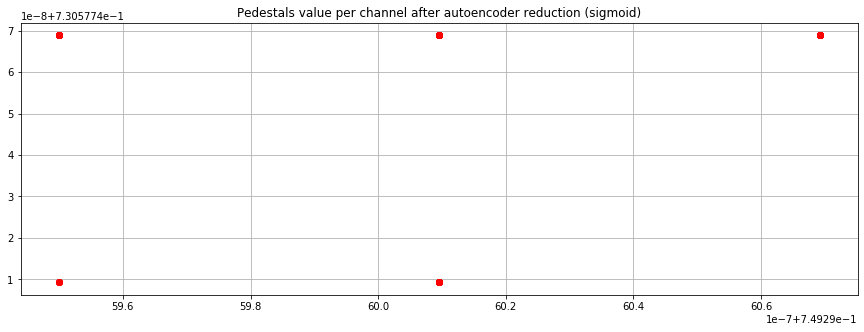

In [59]:
fig, ax = plt.subplots()
ax.set_title('Pedestals value per channel after autoencoder reduction (sigmoid)')

for file in data_files:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("pedestal")]
    data2 = data.loc[:, 2:2049]

    data2.index = module_names()
    data2.columns = range(2048)

    data_test = data2
    
    Zenc = module_encoder.predict(data_test) 

    ax.plot(Zenc[:,0], Zenc[:,1], 'ro')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

In [60]:
ncol = 2048
model15 = Sequential()

# Encoder Layers
model15.add(Dense(2000, activation = 'exponential', input_shape=(ncol,)))
model15.add(Dense(1750, activation = 'exponential'))
model15.add(Dense(1500, activation = 'exponential'))
model15.add(Dense(1250, activation = 'exponential'))
model15.add(Dense(1000, activation = 'exponential'))
model15.add(Dense(750 , activation = 'exponential'))
model15.add(Dense(500 , activation = 'exponential'))
model15.add(Dense(250 , activation = 'exponential'))
model15.add(Dense(100 , activation = 'exponential'))
model15.add(Dense(50  , activation = 'exponential'))
model15.add(Dense(20  , activation = 'exponential'))
model15.add(Dense(2   , activation = 'exponential', name="bottleneck"))

# Decoder Layers
model15.add(Dense(20  , activation = 'exponential'))
model15.add(Dense(50  , activation = 'exponential'))
model15.add(Dense(100 , activation = 'exponential'))
model15.add(Dense(250 , activation = 'exponential'))
model15.add(Dense(500 , activation = 'exponential'))
model15.add(Dense(750 , activation = 'exponential'))
model15.add(Dense(1000, activation = 'exponential'))
model15.add(Dense(1250, activation = 'exponential'))
model15.add(Dense(1500, activation = 'exponential'))
model15.add(Dense(1750, activation = 'exponential'))
model15.add(Dense(2000, activation = 'exponential'))
model15.add(Dense(2048, activation = 'sigmoid'))

# Compile the Model
model15.compile(loss = 'mean_squared_error', optimizer = Adam())

model15.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_243 (Dense)            (None, 2000)              4098000   
_________________________________________________________________
dense_244 (Dense)            (None, 1750)              3501750   
_________________________________________________________________
dense_245 (Dense)            (None, 1500)              2626500   
_________________________________________________________________
dense_246 (Dense)            (None, 1250)              1876250   
_________________________________________________________________
dense_247 (Dense)            (None, 1000)              1251000   
_________________________________________________________________
dense_248 (Dense)            (None, 750)               750750    
_________________________________________________________________
dense_249 (Dense)            (None, 500)               375500    
__________

In [61]:
for file in data_files:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("pedestal")]
    data2 = data.loc[:, 2:2049]

    data2.index = module_names()
    data2.columns = range(2048)

    data_train = data2
    
    model15.fit(data_train, data_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
84/84 [==============================] - 31s 373ms/step - loss: nan
Epoch 2/10
84/84 [==============================] - 2s 19ms/step - loss: nan
Epoch 3/10
84/84 [==============================] - 2s 19ms/step - loss: nan
Epoch 4/10
84/84 [==============================] - 2s 22ms/step - loss: nan
Epoch 5/10
84/84 [==============================] - 2s 22ms/step - loss: nan
Epoch 6/10
84/84 [==============================] - 2s 19ms/step - loss: nan
Epoch 7/10
84/84 [==============================] - 2s 19ms/step - loss: nan
Epoch 8/10
84/84 [==============================] - 3s 32ms/step - loss: nan
Epoch 9/10
84/84 [==============================] - 3s 33ms/step - loss: nan
Epoch 10/10
84/84 [==============================] - 3s 30ms/step - loss: nan
Epoch 1/10
84/84 [==============================] - 2s 20ms/step - loss: nan
Epoch 2/10
84/84 [==============================] - 2s 19ms/step - loss: nan
Epoch 3/10
84/84 [==============================] - 2s 19ms/step - loss: 

Epoch 8/10
84/84 [==============================] - 2s 22ms/step - loss: nan
Epoch 9/10
84/84 [==============================] - 2s 21ms/step - loss: nan
Epoch 10/10
84/84 [==============================] - 2s 24ms/step - loss: nan
Epoch 1/10
84/84 [==============================] - 2s 22ms/step - loss: nan
Epoch 2/10
84/84 [==============================] - 2s 21ms/step - loss: nan
Epoch 3/10
84/84 [==============================] - 2s 18ms/step - loss: nan
Epoch 4/10
84/84 [==============================] - 2s 20ms/step - loss: nan
Epoch 5/10
84/84 [==============================] - 2s 21ms/step - loss: nan
Epoch 6/10
84/84 [==============================] - 1s 17ms/step - loss: nan
Epoch 7/10
84/84 [==============================] - 2s 21ms/step - loss: nan
Epoch 8/10
84/84 [==============================] - 3s 39ms/step - loss: nan
Epoch 9/10
84/84 [==============================] - 2s 21ms/step - loss: nan
Epoch 10/10
84/84 [==============================] - 2s 23ms/step - loss: n

Epoch 5/10
84/84 [==============================] - 2s 27ms/step - loss: nan
Epoch 6/10
84/84 [==============================] - 3s 30ms/step - loss: nan
Epoch 7/10
84/84 [==============================] - 3s 31ms/step - loss: nan
Epoch 8/10
84/84 [==============================] - 2s 22ms/step - loss: nan
Epoch 9/10
84/84 [==============================] - 1s 16ms/step - loss: nan
Epoch 10/10
84/84 [==============================] - 1s 16ms/step - loss: nan
Epoch 1/10
84/84 [==============================] - 2s 29ms/step - loss: nan
Epoch 2/10
84/84 [==============================] - 3s 32ms/step - loss: nan
Epoch 3/10
84/84 [==============================] - 2s 29ms/step - loss: nan
Epoch 4/10
84/84 [==============================] - 3s 32ms/step - loss: nan
Epoch 5/10
84/84 [==============================] - 3s 32ms/step - loss: nan
Epoch 6/10
84/84 [==============================] - 2s 30ms/step - loss: nan
Epoch 7/10
84/84 [==============================] - 2s 29ms/step - loss: na

Epoch 4/10
84/84 [==============================] - 3s 31ms/step - loss: nan
Epoch 5/10
84/84 [==============================] - 3s 41ms/step - loss: nan
Epoch 6/10
84/84 [==============================] - 5s 58ms/step - loss: nan
Epoch 7/10
84/84 [==============================] - 5s 54ms/step - loss: nan
Epoch 8/10
84/84 [==============================] - 4s 51ms/step - loss: nan
Epoch 9/10
84/84 [==============================] - 4s 52ms/step - loss: nan
Epoch 10/10
84/84 [==============================] - 4s 52ms/step - loss: nan
Epoch 1/10
84/84 [==============================] - 3s 31ms/step - loss: nan
Epoch 2/10
84/84 [==============================] - 3s 35ms/step - loss: nan
Epoch 3/10
84/84 [==============================] - 3s 32ms/step - loss: nan
Epoch 4/10
84/84 [==============================] - 2s 29ms/step - loss: nan
Epoch 5/10
84/84 [==============================] - 3s 31ms/step - loss: nan
Epoch 6/10
84/84 [==============================] - 4s 52ms/step - loss: na

In [62]:
module_encoder = Model(model15.input, model15.get_layer('bottleneck').output)
module_encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_243_input (InputLayer) (None, 2048)              0         
_________________________________________________________________
dense_243 (Dense)            (None, 2000)              4098000   
_________________________________________________________________
dense_244 (Dense)            (None, 1750)              3501750   
_________________________________________________________________
dense_245 (Dense)            (None, 1500)              2626500   
_________________________________________________________________
dense_246 (Dense)            (None, 1250)              1876250   
_________________________________________________________________
dense_247 (Dense)            (None, 1000)              1251000   
_________________________________________________________________
dense_248 (Dense)            (None, 750)               750750    
__________

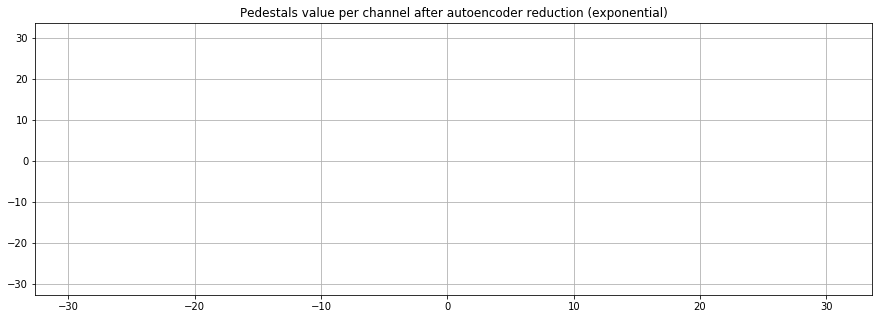

In [63]:
fig, ax = plt.subplots()
ax.set_title('Pedestals value per channel after autoencoder reduction (exponential)')

for file in data_files:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("pedestal")]
    data2 = data.loc[:, 2:2049]

    data2.index = module_names()
    data2.columns = range(2048)

    data_test = data2
    
    Zenc = module_encoder.predict(data_test) 

    ax.plot(Zenc[:,0], Zenc[:,1], 'ro')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()

In [64]:
ncol = 2048
model16 = Sequential()

# Encoder Layers
model16.add(Dense(2000, activation = 'linear', input_shape=(ncol,)))
model16.add(Dense(1750, activation = 'linear'))
model16.add(Dense(1500, activation = 'linear'))
model16.add(Dense(1250, activation = 'linear'))
model16.add(Dense(1000, activation = 'linear'))
model16.add(Dense(750 , activation = 'linear'))
model16.add(Dense(500 , activation = 'linear'))
model16.add(Dense(250 , activation = 'linear'))
model16.add(Dense(100 , activation = 'linear'))
model16.add(Dense(50  , activation = 'linear'))
model16.add(Dense(20  , activation = 'linear'))
model16.add(Dense(2   , activation = 'linear', name="bottleneck"))

# Decoder Layers
model16.add(Dense(20  , activation = 'linear'))
model16.add(Dense(50  , activation = 'linear'))
model16.add(Dense(100 , activation = 'linear'))
model16.add(Dense(250 , activation = 'linear'))
model16.add(Dense(500 , activation = 'linear'))
model16.add(Dense(750 , activation = 'linear'))
model16.add(Dense(1000, activation = 'linear'))
model16.add(Dense(1250, activation = 'linear'))
model16.add(Dense(1500, activation = 'linear'))
model16.add(Dense(1750, activation = 'linear'))
model16.add(Dense(2000, activation = 'linear'))
model16.add(Dense(2048, activation = 'sigmoid'))

# Compile the Model
model16.compile(loss = 'mean_squared_error', optimizer = Adam())

model16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_266 (Dense)            (None, 2000)              4098000   
_________________________________________________________________
dense_267 (Dense)            (None, 1750)              3501750   
_________________________________________________________________
dense_268 (Dense)            (None, 1500)              2626500   
_________________________________________________________________
dense_269 (Dense)            (None, 1250)              1876250   
_________________________________________________________________
dense_270 (Dense)            (None, 1000)              1251000   
_________________________________________________________________
dense_271 (Dense)            (None, 750)               750750    
_________________________________________________________________
dense_272 (Dense)            (None, 500)               375500    
__________

In [65]:
for file in data_files:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("pedestal")]
    data2 = data.loc[:, 2:2049]

    data2.index = module_names()
    data2.columns = range(2048)

    data_train = data2
    
    model16.fit(data_train, data_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
84/84 [==============================] - 24s 283ms/step - loss: 270028.4688
Epoch 2/10
84/84 [==============================] - 2s 26ms/step - loss: 269977.5938
Epoch 3/10
84/84 [==============================] - 2s 26ms/step - loss: 269973.0312
Epoch 4/10
84/84 [==============================] - 2s 26ms/step - loss: 269968.4375
Epoch 5/10
84/84 [==============================] - 2s 27ms/step - loss: 269962.8438
Epoch 6/10
84/84 [==============================] - 2s 27ms/step - loss: 269961.3438
Epoch 7/10
84/84 [==============================] - 2s 25ms/step - loss: 269957.2812
Epoch 8/10
84/84 [==============================] - 2s 26ms/step - loss: 269952.2500
Epoch 9/10
84/84 [==============================] - 1s 17ms/step - loss: 269949.7188
Epoch 10/10
84/84 [==============================] - 1s 15ms/step - loss: 269950.7188
Epoch 1/10
84/84 [==============================] - 2s 27ms/step - loss: 270148.0000
Epoch 2/10
84/84 [==============================] - 2s 26ms/st

Epoch 8/10
84/84 [==============================] - 1s 15ms/step - loss: 271327.6250
Epoch 9/10
84/84 [==============================] - 1s 14ms/step - loss: 271327.6250
Epoch 10/10
84/84 [==============================] - 1s 15ms/step - loss: 271327.6250
Epoch 1/10
84/84 [==============================] - 1s 14ms/step - loss: 271729.7500
Epoch 2/10
84/84 [==============================] - 1s 15ms/step - loss: 271729.7500
Epoch 3/10
84/84 [==============================] - 1s 15ms/step - loss: 271729.7500
Epoch 4/10
84/84 [==============================] - 1s 16ms/step - loss: 271729.7500
Epoch 5/10
84/84 [==============================] - 1s 15ms/step - loss: 271729.7500
Epoch 6/10
84/84 [==============================] - 1s 15ms/step - loss: 271729.7500
Epoch 7/10
84/84 [==============================] - 1s 15ms/step - loss: 271729.7500
Epoch 8/10
84/84 [==============================] - 1s 15ms/step - loss: 271729.7500
Epoch 9/10
84/84 [==============================] - 1s 15ms/step

Epoch 5/10
84/84 [==============================] - 1s 15ms/step - loss: 271261.1562
Epoch 6/10
84/84 [==============================] - 1s 15ms/step - loss: 271261.1875
Epoch 7/10
84/84 [==============================] - 1s 15ms/step - loss: 271261.1875
Epoch 8/10
84/84 [==============================] - 1s 15ms/step - loss: 271261.1875
Epoch 9/10
84/84 [==============================] - 1s 15ms/step - loss: 271261.1875
Epoch 10/10
84/84 [==============================] - 1s 15ms/step - loss: 271261.1875
Epoch 1/10
84/84 [==============================] - 1s 16ms/step - loss: 271469.3125
Epoch 2/10
84/84 [==============================] - 1s 15ms/step - loss: 271469.3125
Epoch 3/10
84/84 [==============================] - 1s 15ms/step - loss: 271469.3125
Epoch 4/10
84/84 [==============================] - 1s 15ms/step - loss: 271469.3125
Epoch 5/10
84/84 [==============================] - 1s 15ms/step - loss: 271469.2812
Epoch 6/10
84/84 [==============================] - 1s 15ms/step

Epoch 2/10
84/84 [==============================] - 2s 27ms/step - loss: 271185.5938
Epoch 3/10
84/84 [==============================] - 2s 27ms/step - loss: 271185.6250
Epoch 4/10
84/84 [==============================] - 2s 26ms/step - loss: 271185.5938
Epoch 5/10
84/84 [==============================] - 2s 25ms/step - loss: 271185.5625
Epoch 6/10
84/84 [==============================] - 2s 26ms/step - loss: 271185.5938
Epoch 7/10
84/84 [==============================] - 2s 27ms/step - loss: 271185.5938
Epoch 8/10
84/84 [==============================] - 2s 26ms/step - loss: 271185.5938
Epoch 9/10
84/84 [==============================] - 2s 25ms/step - loss: 271185.5625
Epoch 10/10
84/84 [==============================] - 2s 25ms/step - loss: 271185.5938
Epoch 1/10
84/84 [==============================] - 1s 17ms/step - loss: 271013.1875
Epoch 2/10
84/84 [==============================] - 2s 27ms/step - loss: 271013.1562
Epoch 3/10
84/84 [==============================] - 2s 27ms/step

Epoch 9/10
84/84 [==============================] - 2s 26ms/step - loss: 271458.2500
Epoch 10/10
84/84 [==============================] - 2s 27ms/step - loss: 271458.2188
Epoch 1/10
84/84 [==============================] - 1s 13ms/step - loss: 271516.9062
Epoch 2/10
84/84 [==============================] - 1s 14ms/step - loss: 271516.9375
Epoch 3/10
84/84 [==============================] - 1s 15ms/step - loss: 271516.9375
Epoch 4/10
84/84 [==============================] - 2s 25ms/step - loss: 271516.9062
Epoch 5/10
84/84 [==============================] - 2s 24ms/step - loss: 271516.9375
Epoch 6/10
84/84 [==============================] - 2s 25ms/step - loss: 271516.9375
Epoch 7/10
84/84 [==============================] - 2s 24ms/step - loss: 271516.9375
Epoch 8/10
84/84 [==============================] - 2s 26ms/step - loss: 271516.9375
Epoch 9/10
84/84 [==============================] - 2s 25ms/step - loss: 271516.9375
Epoch 10/10
84/84 [==============================] - 2s 26ms/ste

In [66]:
module_encoder = Model(model16.input, model16.get_layer('bottleneck').output)
module_encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_266_input (InputLayer) (None, 2048)              0         
_________________________________________________________________
dense_266 (Dense)            (None, 2000)              4098000   
_________________________________________________________________
dense_267 (Dense)            (None, 1750)              3501750   
_________________________________________________________________
dense_268 (Dense)            (None, 1500)              2626500   
_________________________________________________________________
dense_269 (Dense)            (None, 1250)              1876250   
_________________________________________________________________
dense_270 (Dense)            (None, 1000)              1251000   
_________________________________________________________________
dense_271 (Dense)            (None, 750)               750750    
__________

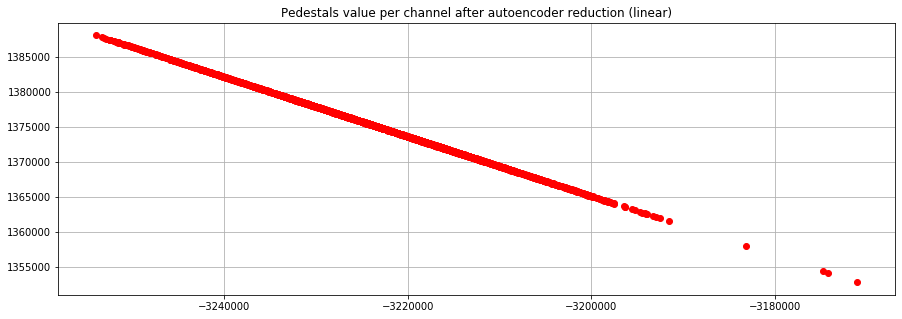

In [67]:
fig, ax = plt.subplots()
ax.set_title('Pedestals value per channel after autoencoder reduction (linear)')

for file in data_files:
    data2 = pd.DataFrame()
    data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
    data = data[data[0].str.contains("pedestal")]
    data2 = data.loc[:, 2:2049]

    data2.index = module_names()
    data2.columns = range(2048)

    data_test = data2
    
    Zenc = module_encoder.predict(data_test) 

    ax.plot(Zenc[:,0], Zenc[:,1], 'ro')
    
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15,5]
ax.grid()
plt.show()